**Ссылка на репозиторий проекта:**  
[https://github.com/gammaray86/module3_sprint19_supervised_learning](https://github.com/gammaray86/module3_sprint19_supervised_learning)

<p style="font-size:20px"><strong>Проект: Обучение с учителем: качество модели</strong></p>

<p style="font-size:16px"><strong>Описание проекта:</strong></p>

К нам обратился онлайн-ритейлер, который заметил, что часть клиентов снижает активность покупок. Компания хочет заранее выявлять таких клиентов и предпринимать меры для их удержания. Для этого требуется построить модель машинного обучения, которая будет прогнозировать вероятность снижения активности, а также провести анализ важности признаков и сегментацию покупателей для выработки персонализированных маркетинговых стратегий.

<p style="font-size:16px"><strong>Цель исследования:</strong></p>

- Построить и настроить модель машинного обучения для предсказания снижения активности клиентов.
- Определить наиболее значимые признаки, влияющие на вероятность снижения активности.
- Сегментировать клиентов по результатам моделирования и предложить рекомендации по работе с каждой группой.

<p style="font-size:16px"><strong>Ход исследования:</strong></p>

- Загрузили и изучили предоставленные датасеты.
- Провели предобработку: устранили дубликаты, привели признаки к корректным типам, исправили неявные дубликаты и опечатки.
- Выполнили исследовательский анализ данных, выявили выбросы и особенности распределений.
- Объединили таблицы в единый датасет для моделирования.
- Изучили корреляции между признаками, исключили признаки с сильной мультиколлинеарностью.
- Построили и протестировали несколько моделей с использованием `Pipeline` и `GridSearchCV`.
- Определили важность признаков с помощью SHAP-анализа.
- Выполнили сегментацию клиентов на основе результатов модели и дополнительных показателей.

<p style="font-size:16px"><strong>Общий вывод:</strong></p>

В ходе работы были успешно объединены и подготовлены данные о клиентах, включая показатели покупательской активности, маркетинговых взаимодействий и поведения на сайте. Предобработка позволила устранить дубликаты, опечатки и привести данные к единому формату. Исследовательский анализ показал отсутствие критичных выбросов и аномалий, а также выявил умеренный дисбаланс целевого признака. При разбиении по таргету видны закономерности: снижение активности чаще встречается у клиентов с меньшими коммуникациями (`marketing_6m`), высокой долей акционных покупок (`promo_purchase_share`), меньшим числом просмотренных страниц (`pages_per_visit`) и большим числом неоплаченных товаров (`unpaid_products_q`).  

Корреляционный анализ с помощью коэффициента Спирмена и матрицы `phi_k` не выявил сильной мультиколлинеарности, однако показал интересные поведенческие группы клиентов по динамике выручки и артефактную связь признака `id` с целевым признаком — его использование недопустимо.  

Для построения предсказательной модели были протестированы несколько алгоритмов, лучшей оказалась модель `KNeighborsClassifier` с кодированием категориальных признаков через `OneHotEncoder` и масштабированием числовых с помощью `StandardScaler`. На тестовой выборке она показала высокие результаты: ROC-AUC 0.9253 и accuracy 0.9138.  

SHAP-анализ показал, что наибольшее влияние на прогноз оказывают такие признаки, как число страниц за визит (`pages_per_visit`), время на сайте (`minutes_текущий_месяц`, `minutes_предыдущий_месяц`), число категорий за визит (`avg_categories_per_visit`). При этом признаки выступают индикаторами, а не причинами изменения активности.  

На основе результатов моделирования и показателей прибыльности была проведена сегментация клиентов, выделены три группы:  
1) высокоприбыльные с высокой вероятностью снижения активности;  
2) ориентированные на акции с высоким риском снижения активности;  
3) с падением вовлечённости на сайте.  

Для каждой группы предложены целевые маркетинговые меры: программы лояльности и VIP-обслуживание, персональные акции и купоны, рекомендации и геймификация для повышения вовлечённости. При согласии заказчика возможна выгрузка списка `id` клиентов в каждом сегменте для передачи в маркетинговый отдел.

<p style="font-size:18px"><strong>Описание данных</strong></p>

`market_file.csv`  
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.  
- `id` — номер покупателя в корпоративной базе данных.  
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».  
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт». Зависит от наличия определенной подписки у пользователя.  
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.  
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.  
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.  
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.  
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.  
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.  
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.  
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.  
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца.  
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.  

`market_money.csv`  
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.  
- `id` — номер покупателя в корпоративной базе данных.  
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.  
- `Выручка` — сумма выручки за период в условных единицах.  

`market_time.csv`  
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.  
- `id` — номер покупателя в корпоративной базе данных.  
- `Период` — название периода, во время которого зафиксировано общее время.  
- `минут` — значение времени, проведённого на сайте, в минутах.  

`money.csv`  
Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.  
- `id` — номер покупателя в корпоративной базе данных.  
- `Прибыль` — значение прибыли в условных единицах.

<p style="font-size:18px"><strong>Содержание</strong></p>

- [Загрузка данных](#title1)<br/>
- [Предобработка данных](#title2)<br/>
- [Исследовательский анализ данных](#title3)<br/>
    - [Анализ количественных признаков](#subtitle1)<br/>
    - [Анализ категориальных признаков](#subtitle2)<br/>
- [Объединение таблиц](#title4)<br/>
- [Корреляционный анализ](#title5)<br/>
- [Использование пайплайнов](#title6)<br/>
    - [Кодирование и масштабирование признаков](#subtitle3)<br/>
    - [Обучение моделей](#subtitle4)<br/>
- [Анализ важности признаков](#title7)<br/>
- [Сегментация покупателей](#title8)<br/>
- [Общий вывод](#title9)<br/>

In [1]:
!pip install matplotlib==3.5 -q
!pip install phik -q
!pip install shap -q
!pip install scikit-learn==1.2.0 -q

In [2]:
# сторонние библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns
import numpy as np
import plotly.express as px
from phik import phik_matrix
import shap

# scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

RANDOM_STATE = 42

В самом начале расположим вспомогательные функции, использующиеся в проекте.

In [3]:
# функция для нормализации текста
def normalize_text(text):
    if not isinstance(text, str):
        return text
    text = text.lower().replace('ё', 'е').strip()
    text = ' '.join(text.split())
    return text

# функция для нормализации строк во всех строковых столбцах датафрейма
def normalize_text_columns(df):
    """
    Применяет функцию normalize_text ко всем строковым столбцам датафрейма.

    Аргументы:
        df — исходный DataFrame

    Возвращает:
        DataFrame с нормализованными строками в текстовых столбцах.
    """
    for col in df.select_dtypes(include=['object', 'category']).columns:
        df[col] = df[col].apply(normalize_text)
    return df  # можно вернуть для удобства, хотя работает in-place

# функция для анализа категориальных столбцов и просмотра уникальных значений
def analyze_text_columns(df, normalize=False, dropna=False, max_values=50):
    """
    Вывод уникальных значений для всех категориальных/текстовых столбцов.

    Аргументы:
        df — датафрейм
        normalize — применять ли нормализацию текста
        dropna — исключать ли пропуски
        max_values — максимальное количество уникальных значений для вывода (в противном случае сообщение "и ещё N значений")

    Возвращает:
        None (выводит информацию на экран)
    """

    # проходим по всем столбцам object / category
    for column in df.select_dtypes(include=['object', 'category']).columns:
        values = df[column].dropna() if dropna else df[column]

        # нормализация при необходимости
        if normalize:
            values = values.apply(normalize_text)

        uniques = sorted(values.unique())
        total = len(uniques)

        # ограничиваем вывод, если значений много
        if total > max_values:
            shown = uniques[:max_values]
            rest = total - max_values
            print(f"{column} : {', '.join(shown)} … и ещё {rest} знач.")
        else:
            print(f"{column} : {', '.join(uniques)}")


# функция проверки корректности изменений
def compare_changes(df_old, df_new, columns=None, mode='by_column'):
    """
    Сравнение двух датафреймов по заданным или всем столбцам.
    Показывает строки, где произошло хотя бы одно изменение,
    включая замену NaN на значение или наоборот.

    Аргументы:
        df_old: датафрейм до изменений
        df_new: датафрейм после изменений
        columns: список столбцов для сравнения (если None и mode='all', берутся все общие)
        mode: 'by_column', 'grouped' или 'all'

    Возвращает:
        DataFrame с изменениями
    """
    common_idx = df_old.index.intersection(df_new.index)

    # если выбран режим 'all', сравниваем все общие столбцы
    if mode == 'all':
        columns = df_old.columns.intersection(df_new.columns).tolist()

    # если columns всё ещё не задан, возбуждаем исключение
    if not columns:
        raise ValueError("Не передан список столбцов для сравнения и не выбран режим 'all'")

    result = []

    for col in columns:
        old = df_old.loc[common_idx, col]
        new = df_new.loc[common_idx, col]

        # фиксируем любое изменение:
        # 1. NaN → значение
        # 2. значение → NaN
        # 3. значение1 → значение2 (с учётом погрешности для чисел)
        # если тип числовой и не object — сравниваем через np.isclose
        if pd.api.types.is_numeric_dtype(old) and not pd.api.types.is_object_dtype(old):
            try:
                changed = (old.isna() & new.notna()) | \
                          (old.notna() & new.isna()) | \
                          (old.notna() & new.notna() & ~np.isclose(old, new, equal_nan=True))
            except Exception:
                changed = (old.isna() & new.notna()) | \
                          (old.notna() & new.isna()) | \
                          (old.notna() & new.notna() & ~old.eq(new))

        # если категориальный — сравниваем как строки
        elif pd.api.types.is_categorical_dtype(old):
            old_str = old.astype(str)
            new_str = new.astype(str)
            changed = (old.isna() & new.notna()) | \
                      (old.notna() & new.isna()) | \
                      (old.notna() & new.notna() & ~old_str.eq(new_str))

        # остальные (в том числе object и str) — обычное сравнение
        else:
            changed = (old.isna() & new.notna()) | \
                      (old.notna() & new.isna()) | \
                      (old.notna() & new.notna() & ~old.eq(new))

        if changed.any():
            changes = pd.DataFrame({
                'index': old[changed].index,
                f'{col} (было)': old[changed],
                f'{col} (стало)': new[changed]
            }).set_index('index')
            result.append(changes)

    if not result:
        return pd.DataFrame()

    # объединяем результаты сравнения
    if mode in ['by_column', 'all']:
        return pd.concat(result, axis=1)
    elif mode == 'grouped':
        grouped = pd.concat(result, axis=1)
        return grouped.loc[:, ~grouped.columns.duplicated()]
    else:
        raise ValueError("mode должен быть 'grouped', 'by_column' или 'all'")
        
# функция для анализа количественного признака
def analyze_numeric_column(df, column, xlabel='', ylabel='', bins=50, figsize=(12, 5), hue=None, discrete=None):
    """
    Анализ количественного признака: describe и визуализация.
    Для дискретных признаков (≤20 уникальных значений) автоматически:
      - вместо boxplot/гистограммы используем countplot (столбчатая диаграмма частот),
      - оставляем признак по оси X; при желании можно добавить разбиение по таргету через hue.
    
    Аргументы:
        df — датафрейм
        column — название столбца
        xlabel — подпись оси X
        ylabel — подпись оси Y
        bins — количество корзин в гистограмме (для непрерывных)
        figsize — размер графика
        hue — столбец для разбиения распределений
        discrete — флаг дискретности; None — авто (≤20 уникальных)
    """
    s = df[column].dropna()

    # если подписи не заданы, подставляем разумные значения
    if not xlabel:
        xlabel = column

    # выводим базовую статистику
    display(s.describe())

    # автоопределяем дискретность, если не задано явно
    if discrete is None:
        discrete = s.nunique() <= 20
        
    # подпись оси Y — после определения discrete
    if not ylabel:
        ylabel = 'Частота' if (discrete or hue is None) else 'Плотность'

    if discrete:
        # ДИСКРЕТНЫЙ СЛУЧАЙ: вместо boxplot/гистограммы строим countplot
        plt.figure(figsize=figsize)
        order = sorted(s.unique())  # задаём порядок категорий по возрастанию
        sns.countplot(data=df, x=column, hue=hue, order=order)
        plt.title(f'Распределение дискретного признака «{xlabel}»')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True, axis='y')
        plt.show()
    else:
        # НЕПРЕРЫВНЫЙ СЛУЧАЙ: boxplot
        plt.figure(figsize=figsize)
        plt.boxplot(s, vert=False)  # показываем форму распределения и выбросы
        plt.title(f'Boxplot признака «{xlabel}»')
        plt.xlabel(xlabel)
        plt.grid(True)
        plt.show()

        # и гистограмма (опционально с разбиением по таргету)
        plt.figure(figsize=figsize)
        if hue is not None:
            sns.histplot(data=df, x=column, hue=hue,  bins=bins, kde=True, 
                multiple='layer', stat='density', common_norm=False, # сравниваем плотности классов без общей нормировки
                alpha=0.6
            )
        else:
            sns.histplot(data=df, x=column, bins=bins, kde=True)
        plt.title(f'Гистограмма признака «{xlabel}»')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.show()
    
# функция для анализа категориального признака
def analyze_category_column(df, column, top_n=None, sort=True, figsize=(12, 5), show_alert=True, hue=None):
    """
    Анализ категориального признака: value_counts, доли, предупреждение и два barplot-графика.
    Дополнительно, если задан параметр `hue`, строится третий график — столбчатая
    диаграмма частот (seaborn.countplot) с разбиением по указанному столбцу.
    При наличии `top_n` редкие категории на этом графике объединяются в 'Другое',
    порядок категорий фиксируется по таблице `result`.

    Аргументы:
        df — датафрейм
        column — название столбца
        top_n — отображать только топ-N категорий (остальные объединяются в 'Другое')
        sort — сортировать ли категории по убыванию
        figsize — размер графиков
        show_alert — выводить ли предупреждение при доминировании одной категории
        hue — столбец для разбиения по таргету (опционально); при указании рисуется
              дополнительный countplot с цветовой разбивкой

    Возвращает:
        DataFrame — таблицу категорий с абсолютными и относительными частотами.
    """    

    # преобразуем столбец
    series = df[column]
    total = len(series)

    # считаем количество значений по категориям
    counts = series.value_counts(dropna=False)

    # если задан top_n — укрупняем редкие категории в 'Другое'
    top_n_applied = (top_n is not None) and (top_n < len(counts))
    if top_n_applied:
        top_categories = counts.nlargest(top_n)
        other_count = counts.sum() - top_categories.sum()
        counts = pd.concat([top_categories, pd.Series({'Другое': other_count})])

    # сортировка по убыванию
    if not sort:
        counts = counts.sort_values()

    # формируем таблицу для вывода
    result = pd.DataFrame({'category': counts.index, 'count': counts.values})
    result['percent'] = (result['count'] / total * 100).round(2)
    result['category'] = result['category'].astype(str)

    # выводим таблицу
    display(result)

    dpi = plt.rcParams['figure.dpi']
    # разбиение по таргету (если задано)
    if hue is not None:
        cat_series = series.astype('object')
        if top_n_applied:
            keep = set(result['category'].astype(str).tolist()) - {'Другое'}
            cat_series = cat_series.astype(str).where(cat_series.astype(str).isin(keep), 'Другое')
        plot_df = pd.DataFrame({column: cat_series.astype(str), hue: df[hue]})
        order = result['category'].astype(str).tolist()

        plt.figure(figsize=figsize)
        ax = sns.countplot(data=plot_df, y=column, hue=hue, order=order)

        # подписи категорий поверх полос слева
        offset = transforms.ScaledTranslation(5 / dpi, 0, ax.figure.dpi_scale_trans)  # фиксированный сдвиг
        text_transform = ax.transData + offset
        for y_pos, label in zip(ax.get_yticks(), order):
            ax.text(0, y_pos, label,
                    transform=text_transform, ha='left', va='center',
                    color='black', fontsize=12, fontweight='bold')        
        plt.xlabel('Частота')
        plt.ylabel('Категория')
        plt.title(f"Частоты по таргету: {column}")
        ax.set_yticklabels([])  # скрываем метки на оси Y
        plt.grid(axis='x', linestyle='--')
        plt.tight_layout()
        plt.show()

    # при необходимости — предупреждение о доминирующей категории
    if show_alert and result['count'].iloc[0] / total > 0.8:
        print(f"⚠️ Предупреждение: категория '{result['category'].iloc[0]}' составляет более 80% всех значений.")

    # barplot: абсолютные значения
    plt.figure(figsize=figsize)
    bars = plt.barh(result['category'], result['count'], color='lightskyblue')
    ax = plt.gca()
    
    # подписи категорий поверх полос слева
    offset = transforms.ScaledTranslation(5 / dpi, 0, ax.figure.dpi_scale_trans)  # фиксированный сдвиг
    text_transform = ax.transData + offset
    for bar, label in zip(bars, result['category']):
        ax.text(0, bar.get_y() + bar.get_height() / 2, label,
                transform=text_transform, ha='left', va='center',
                color='black', fontsize=12, fontweight='bold')
    plt.xlabel('Количество')
    plt.ylabel('Категория')
    plt.title(f"Частоты: {column}")
    ax.set_yticklabels([])  # скрываем метки на оси Y
    ax.invert_yaxis()
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()

    # barplot: доли
    plt.figure(figsize=figsize)
    bars = plt.barh(result['category'], result['percent'], color='peachpuff')
    ax = plt.gca()

    # подписи категорий поверх полос слева
    offset = transforms.ScaledTranslation(5 / dpi, 0, ax.figure.dpi_scale_trans)  # фиксированный сдвиг
    text_transform = ax.transData + offset
    for bar, label in zip(bars, result['category']):        
        ax.text(0, bar.get_y() + bar.get_height() / 2, label,
                transform=text_transform, ha='left', va='center',
                color='black', fontsize=12, fontweight='bold')
    plt.xlabel('Доля (%)')
    plt.ylabel('Категория')
    plt.title(f"Доли (%): {column}")
    ax.set_yticklabels([])  # скрываем метки на оси Y
    ax.invert_yaxis()
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()

    return result

# функция для Sunburst-диаграммы
def plot_sunburst(df, path, max_leaf=20, title='Sunburst', figsize=(12, 5)):
    """
    Строит Sunburst-диаграмму по иерархии категориальных столбцов.

    Аргументы:
        df — исходный DataFrame
        path — список столбцов (от верхнего уровня к нижнему)
        max_leaf — максимум категорий на последнем уровне; остальные -> 'Другое'
        title — заголовок
        figsize — (ширина, высота) в дюймах, как в matplotlib
    """
    # не меняем исходный df
    s = df.copy()

    # последний уровень (листья)
    leaf = path[-1]
    vc = s[leaf].value_counts(dropna=False)
    
    # укрупняем редкие категории на последнем уровне
    if max_leaf is not None and len(vc) > max_leaf:
        keep = vc.nlargest(max_leaf).index
        s[leaf] = s[leaf].where(s[leaf].isin(keep), 'Другое')

    fig = px.sunburst(s, path=path, title=title)

    # используем matplotlib DPI
    if figsize is not None:
        dpi = float(plt.rcParams.get('figure.dpi', 100))
        h = int(figsize[1] * dpi)
        # ширина адаптивная, высота — по figsize
        fig.update_layout(autosize=True, height=h, margin=dict(t=40, r=0, b=0, l=0))

    fig.update_traces(textinfo='label+percent parent')
    fig.show(config={'responsive': True})
    
# функция преобразования MultiIndex-колонок в обычные, соединяя уровни через разделитель sep
def flatten_pivot_columns(df, sep='_'):
    df.columns = [
        sep.join(str(c) for c in col if c)
        if isinstance(col, tuple) else str(col)
        for col in df.columns
    ]
    return df
    
# функция для оптимизации числовых типов данных
def optimize_memory_usage(df, print_size=True):
    """
    Оптимизация потребления памяти датафрейма.

    Аргументы:
        df — входная таблица
        print_size — печатать ли сводку до/после

    Возвращает:
        датафрейм с ужатыми числовыми типами
    """
    # список числовых типов для проверки
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    # размер памяти до оптимизации (в мб)
    before_size = df.memory_usage().sum() / 1024**2

    # проход по столбцам и ужатие типов
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()

            # целочисленные столбцы
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)

            # вещественные столбцы
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)

    # размер памяти после оптимизации (в мб)
    after_size = df.memory_usage().sum() / 1024**2

    # вывод сводки при необходимости
    if print_size:
        print('Размер использования памяти: до {:5.2f} мб — после {:5.2f} мб ({:.1f}%)'
              .format(before_size, after_size, 100 * (before_size - after_size) / before_size))

    return df

# функция получения списка столбцов по типам или именам
def get_columns_by_types(df, kinds=None, names=None, except_columns=None):
    """
    Возвращает список столбцов, удовлетворяющих типам по .dtype.kind или .dtype.name.

    Аргументы:
        df (DataFrame): входной DataFrame
        kinds (tuple): коды .dtype.kind, например ('i', 'f') для числовых
        names (tuple): имена типов, например ('category', 'object')
        except_columns (list): список столбцов, которые нужно исключить

    Возвращает:
        list: список подходящих столбцов
    """
    if except_columns is None:
        except_columns = []

    columns = []
    for col in df.columns:
        if col in except_columns:
            continue
        dtype = df[col].dtype
        if kinds and dtype.kind in kinds:
            columns.append(col)
        elif names and dtype.name in names:
            columns.append(col)
    return columns

# функция для построения scatter plot
def plot_scatter_with_hue(df, x_col, y_col, hue=None, title='', xlabel='', ylabel='', legend_title='', figsize=(12, 5)):
    """
    Строит scatter plot для двух числовых признаков с возможной окраской по категориальному признаку.

    Аргументы:
        df — датафрейм
        x_col — название столбца для оси X
        y_col — название столбца для оси Y
        hue — столбец для окраски точек (по умолчанию None — без разбиения)
        title — заголовок графика
        xlabel — подпись оси X (по умолчанию имя столбца x_col)
        ylabel — подпись оси Y (по умолчанию имя столбца y_col)
        legend_title — заголовок легенды (по умолчанию имя hue)
        figsize — размер графика
    """

    # подставляем разумные подписи, если явно не заданы
    if not xlabel:
        xlabel = x_col
    if not ylabel:
        ylabel = y_col
    if not title:
        title = f'Диаграмма рассеяния: {xlabel} vs {ylabel}' + (f' (hue = {hue})' if hue else '')
    if not legend_title and hue is not None:
        legend_title = hue

    # строим график
    plt.figure(figsize=figsize)
    sns.scatterplot(x=df[x_col], y=df[y_col], hue=df[hue] if hue else None, alpha=0.6)

    # оформление
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if hue:
        plt.legend(title=legend_title)
    else:
        plt.legend([], [], frameon=False)  # скрыть пустую легенду
    plt.tight_layout()
    plt.show()

<a name="title1"></a>
## Загрузка данных

Загрузим все четыре таблицы для дальнейшего исследования.  
В первых трёх таблицах (`market_file.csv`, `market_money.csv`, `market_time.csv`) дробный разделитель — точка, поэтому загрузка без дополнительных параметров корректна.  
В таблице `money.csv` используется разделитель столбцов `;` и разделитель дробной части `,`.

In [4]:
# загружаем данные
market_file = pd.read_csv('datasets/market_file.csv')
market_money = pd.read_csv('datasets/market_money.csv')
market_time = pd.read_csv('datasets/market_time.csv')
money = pd.read_csv('datasets/money.csv', sep=';', decimal=',')

# выводим первые строки таблиц
display(market_file.head())
display(market_money.head())
display(market_time.head())
display(money.head())

# выводим общую информацию о таблицах
market_file.info()
print()
market_money.info()
print()
market_time.info()
print()
money.info()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Переименуем столбцы в английские названия в формате `snake_case` для удобства работы.

In [5]:
# переименовываем столбцы в market_file
market_file = market_file.rename(columns={
    'Покупательская активность': 'activity',
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'allow_messages',
    'Маркет_актив_6_мес': 'marketing_6m',
    'Маркет_актив_тек_мес': 'marketing_current',
    'Длительность': 'duration_days',
    'Акционные_покупки': 'promo_purchase_share',
    'Популярная_категория': 'popular_category',
    'Средний_просмотр_категорий_за_визит': 'avg_categories_per_visit',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_products_q',
    'Ошибка_сервиса': 'service_failures',
    'Страниц_за_визит': 'pages_per_visit'
})

# переименовываем столбцы в market_money
market_money = market_money.rename(columns={
    'Период': 'period',
    'Выручка': 'revenue'
})

# переименовываем столбцы в market_time
market_time = market_time.rename(columns={
    'Период': 'period',
    'минут': 'minutes'
})

# переименовываем столбцы в money
money = money.rename(columns={
    'Прибыль': 'profit'
})

# выводим общую информацию о таблицах
market_file.info()
print()
market_money.info()
print()
market_time.info()
print()
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1300 non-null   int64  
 1   activity                  1300 non-null   object 
 2   service_type              1300 non-null   object 
 3   allow_messages            1300 non-null   object 
 4   marketing_6m              1300 non-null   float64
 5   marketing_current         1300 non-null   int64  
 6   duration_days             1300 non-null   int64  
 7   promo_purchase_share      1300 non-null   float64
 8   popular_category          1300 non-null   object 
 9   avg_categories_per_visit  1300 non-null   int64  
 10  unpaid_products_q         1300 non-null   int64  
 11  service_failures          1300 non-null   int64  
 12  pages_per_visit           1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB

<cl

Во всех четырёх таблицах данные загружены корректно и соответствуют описанию из задания.  
Названия столбцов приведены к английскому формату `snake_case`, типы данных соответствуют содержимому, ошибки с разделителями устранены.  
Из `info()` видно, что пропусков в данных нет. Таблицы готовы к дальнейшему исследованию.

<a name="title2"></a>
## Предобработка данных

В первом шаге мы убедились, что пропусков в данных нет. Теперь проверим таблицы на наличие явных дубликатов.

In [6]:
# проверяем наличие явных дубликатов в каждой таблице
print('market_file duplicates:', market_file.duplicated().sum())
print('market_money duplicates:', market_money.duplicated().sum())
print('market_time duplicates:', market_time.duplicated().sum())
print('money duplicates:', money.duplicated().sum())

market_file duplicates: 0
market_money duplicates: 0
market_time duplicates: 0
money duplicates: 0


Во всех таблицах явных дубликатов не обнаружено.  
Далее проверим типы столбцов и при необходимости приведём их к корректным типам данных.

In [7]:
# выводим первые строки таблиц
display(market_file.head())
display(market_money.head())
display(market_time.head())
display(money.head())

# выводим типы данных для всех таблиц
market_file.dtypes, market_money.dtypes, market_time.dtypes, money.dtypes

id   activity service_type allow_messages  marketing_6m  \
0  215348  Снизилась      премиум             да           3.4   
1  215349  Снизилась      премиум             да           4.4   
2  215350  Снизилась    стандартт            нет           4.9   
3  215351  Снизилась    стандартт             да           3.2   
4  215352  Снизилась    стандартт            нет           5.1   

   marketing_current  duration_days  promo_purchase_share   popular_category  \
0                  5            121                  0.00   Товары для детей   
1                  4            819                  0.75   Товары для детей   
2                  3            539                  0.14  Домашний текстиль   
3                  5            896                  0.99   Товары для детей   
4                  3           1064                  0.94   Товары для детей   

   avg_categories_per_visit  unpaid_products_q  service_failures  \
0                         6                  2                 1   
1                         4                  4                 2   
2                         5                  2                 1   
3                         5                  0                 6   
4                         3                  2                 3   

   pages_per_visit  
0                5  
1                5  
2                5  
3                4  
4                2

id               period  revenue
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

id            period  minutes
0  215348     текущий_месяц       14
1  215348  предыдцщий_месяц       13
2  215349     текущий_месяц       10
3  215349  предыдцщий_месяц       12
4  215350     текущий_месяц       13

id  profit
0  215348    0.98
1  215349    4.16
2  215350    3.13
3  215351    4.87
4  215352    4.21

(id                            int64
 activity                     object
 service_type                 object
 allow_messages               object
 marketing_6m                float64
 marketing_current             int64
 duration_days                 int64
 promo_purchase_share        float64
 popular_category             object
 avg_categories_per_visit      int64
 unpaid_products_q             int64
 service_failures              int64
 pages_per_visit               int64
 dtype: object,
 id           int64
 period      object
 revenue    float64
 dtype: object,
 id          int64
 period     object
 minutes     int64
 dtype: object,
 id          int64
 profit    float64
 dtype: object)

Все столбцы с типом `object` содержат категориальные данные, поэтому их можно привести к типу `category` для оптимизации памяти и удобства анализа.

In [8]:
# приводим категориальные столбцы к типу category
for col in ['activity', 'service_type', 'allow_messages', 'popular_category']:
    market_file[col] = market_file[col].astype('category')

market_money['period'] = market_money['period'].astype('category')
market_time['period'] = market_time['period'].astype('category')

# проверяем результат
market_file.dtypes, market_money.dtypes, market_time.dtypes

(id                             int64
 activity                    category
 service_type                category
 allow_messages              category
 marketing_6m                 float64
 marketing_current              int64
 duration_days                  int64
 promo_purchase_share         float64
 popular_category            category
 avg_categories_per_visit       int64
 unpaid_products_q              int64
 service_failures               int64
 pages_per_visit                int64
 dtype: object,
 id            int64
 period     category
 revenue     float64
 dtype: object,
 id            int64
 period     category
 minutes       int64
 dtype: object)

После проверки явных дубликатов и приведения типов данных выполним проверку на наличие неявных дубликатов. Для этого создадим копии таблиц, чтобы можно было сравнить изменения после нормализации текста.

In [9]:
# копируем данные до изменения для проверки верности заполнения
market_file_old = market_file.copy()
market_money_old = market_money.copy()
market_time_old = market_time.copy()
money_old = money.copy()

Теперь приведём строки в категориальных признаках к единому стилю написания. Для этого применим функцию `normalize_text_columns()` ко всем датафреймам. После этого сравним, какие именно значения были изменены, и повторно проверим таблицы на наличие неявных дубликатов.

In [10]:
# применяем normalize_text_columns ко всем датафреймам
normalize_text_columns(market_file)
normalize_text_columns(market_money)
normalize_text_columns(market_time)
normalize_text_columns(money)

# смотрим изменения
display(compare_changes(market_file_old, market_file, mode='all').head())
display(compare_changes(market_money_old, market_money, mode='all').head())
display(compare_changes(market_time_old, market_time, mode='all').head())
display(compare_changes(money_old, money, mode='all').head())

# проверяем наличие неявных дубликатов после нормализации текста
print('market_file duplicates:', market_file.duplicated().sum())
print('market_money duplicates:', market_money.duplicated().sum())
print('market_time duplicates:', market_time.duplicated().sum())
print('money duplicates:', money.duplicated().sum())

activity (было) activity (стало) popular_category (было)  \
index                                                            
0           Снизилась        снизилась        Товары для детей   
1           Снизилась        снизилась        Товары для детей   
2           Снизилась        снизилась       Домашний текстиль   
3           Снизилась        снизилась        Товары для детей   
4           Снизилась        снизилась        Товары для детей   

      popular_category (стало)  
index                           
0             товары для детей  
1             товары для детей  
2            домашний текстиль  
3             товары для детей  
4             товары для детей

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

market_file duplicates: 0
market_money duplicates: 0
market_time duplicates: 0
money duplicates: 0


Очистим память.

In [11]:
if 'market_file_old' in locals():
    del market_file_old, market_money_old, market_time_old, money_old
    print('Память очищена!')

Память очищена!


После нормализации строк неявные дубликаты в таблицах не обнаружены. Для окончательной проверки на неявные дубликаты выведем уникальные значения в категориальных столбцах и визуально убедимся, что после нормализации не осталось похожих, но различающихся по написанию значений.

In [12]:
# проверяем неявные дубликаты в категориальных столбцах "на глаз"
analyze_text_columns(market_file)
analyze_text_columns(market_money)
analyze_text_columns(market_time)
analyze_text_columns(money)

activity : прежний уровень, снизилась
service_type : премиум, стандарт, стандартт
allow_messages : да, нет
popular_category : домашний текстиль, косметика и аксесуары, кухонная посуда, мелкая бытовая техника и электроника, техника для красоты и здоровья, товары для детей
period : предыдущий_месяц, препредыдущий_месяц, текущий_месяц
period : предыдцщий_месяц, текущий_месяц


После визуального анализа уникальных значений категориальных столбцов мы обнаружили неявный дубликат в таблице `market_file`- значения `"стандарт"` и `"стандартт"` в столбце `service_type` обозначают одно и то же. Так же подметим опечатки `аксесуары` и `предыдцщий_месяц` в столбца `market_file['popular_category']` и `market_time['period']` соответственно и исправим их.

In [13]:
# устраняем неявный дубликат
market_file['service_type'] = market_file['service_type'].replace('стандартт', 'стандарт')

# проверяем, остались ли дубликаты после исправлений
print('market_file duplicates:', market_file.duplicated().sum())

# исправляем опечатки
market_file['popular_category'] = market_file['popular_category'].replace('аксесуары', 'аксессуары')
market_time['period'] = market_time['period'].replace('предыдцщий_месяц', 'предыдущий_месяц')

# проверяем исправления
analyze_text_columns(market_file)
analyze_text_columns(market_time)

market_file duplicates: 0
activity : прежний уровень, снизилась
service_type : премиум, стандарт
allow_messages : да, нет
popular_category : домашний текстиль, косметика и аксесуары, кухонная посуда, мелкая бытовая техника и электроника, техника для красоты и здоровья, товары для детей
period : предыдущий_месяц, текущий_месяц


После замены значений повторная проверка показала, что неявных дубликатов в таблице `market_file` нет.  
Проверим количество записей на клиента: в `market_money` должно быть по 3 периода на `id`, в `market_time` — по 2. Выведем проблемных клиентов, если есть.

In [14]:
# считаем число записей на каждого клиента по таблицам периодов
mm_counts = market_money.groupby('id').size()
mt_counts = market_time.groupby('id').size()

# находим клиентов с некорректным числом периодов
bad_mm = mm_counts[mm_counts != 3]
bad_mt = mt_counts[mt_counts != 2]

# выводим сводку
print('market_money: клиентов с числом периодов != 3:', bad_mm.shape[0])
print('market_time : клиентов с числом периодов != 2:', bad_mt.shape[0])

# показываем первые строки проблемных клиентов (если есть)
if not bad_mm.empty:
    print('\nпример проблемных id в market_money:')
    display(bad_mm.head())
if not bad_mt.empty:
    print('\nпример проблемных id в market_time:')
    display(bad_mt.head())

market_money: клиентов с числом периодов != 3: 0
market_time : клиентов с числом периодов != 2: 0


Проблемных `id` в таблицах `market_money` и `market_time` не обнаружено.  
Проверим уникальность `id` в таблицах с одной строкой на клиента (`market_file`, `money`).

In [15]:
# проверяем наличие дубликатов по id
print('market_file duplicated ids:', market_file['id'].duplicated().sum())
print('money duplicated ids:', money['id'].duplicated().sum())

market_file duplicated ids: 0
money duplicated ids: 0


В таблицах `market_file` и `money` дубликатов по `id` не обнаружено, количество записей на клиента в таблицах с периодами соответствует ожидаемому.

На этапе предобработки данных мы выполнили следующие действия:

- Убедились в отсутствии пропусков в данных;
- Проверили наличие явных дубликатов (не обнаружено);
- Привели категориальные признаки к типу `category`;
- Применили нормализацию текста ко всем строковым признакам для проверки неявных дубликатов (неявных дубликатом так же не обнаружено);
- Проверили корректность преобразований с помощью вспомогательной функции;
- Исправили неявные дубликаты и опечатки в `market_file['service_type']`, `market_file['popular_category']` и `market_time['period']`;
- Проверили, что количество записей на клиента в таблицах с периодами соответствует ожидаемому;
- Убедились в уникальности `id` в таблицах с одной строкой на клиента.

Выбросы, аномалии и невалидные значения, не выявляемые техническими методами, будут рассмотрены на следующем этапе с использованием графиков и статистических методов.

<a name="title3"></a>
## Исследовательский анализ данных

Выделим группу клиентов с покупательской активностью не менее трёх месяцев.  
Для этого в таблице `market_money` проверим, что у клиента выручка больше нуля во всех трёх периодах.

In [16]:
# считаем количество месяцев с ненулевой выручкой у каждого клиента
active_clients = (market_money.groupby('id')['revenue'].apply(lambda x: (x > 0).sum()))

# отбираем id с активностью во всех трёх месяцах
active_clients_ids = active_clients[active_clients == 3].index

# проверяем количество клиентов в выборках
len(active_clients_ids)

1297

Доля клиентов с активностью менее трёх месяцев составляет менее 0,3% от всей базы (3 клиента из 1300).  
Исключим их из всех таблиц, чтобы не учитывать в дальнейшем анализе и построении модели.

In [17]:
# удаляем неактивных клиентов из всех таблиц
market_file = market_file[market_file['id'].isin(active_clients_ids)]
market_money = market_money[market_money['id'].isin(active_clients_ids)]
market_time = market_time[market_time['id'].isin(active_clients_ids)]
money = money[money['id'].isin(active_clients_ids)]

# проверяем количество уникальных клиентов после удаления
print(market_file['id'].nunique())
print(market_money['id'].nunique())
print(market_time['id'].nunique())
print(money['id'].nunique())

1297
1297
1297
1297


<a name="subtitle1"></a>
### Анализ количественных признаков

Для анализа количественных признаков используем вспомогательную функцию `analyze_numeric_column()`, которая выводит `describe()` и визуализации признака. Для непрерывных признаков строятся диаграмма размаха (boxplot) и гистограмма. Для дискретных признаков (≤ 20 уникальных значений) автоматически используется столбчатая диаграмма частот (countplot) вместо гистограммы. Для признаков из `market_file` все графики строим с разбивкой по таргету (`hue='activity'`).  
Для таблиц без целевого признака (`market_money`, `market_time`, `money`) разбивка не применяется.

Проанализируем количественный признак `marketing_6m` (Среднемесячные маркетинговые коммуникации за 6 мес).

count    1297.000000
mean        4.254433
std         1.015618
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: marketing_6m, dtype: float64

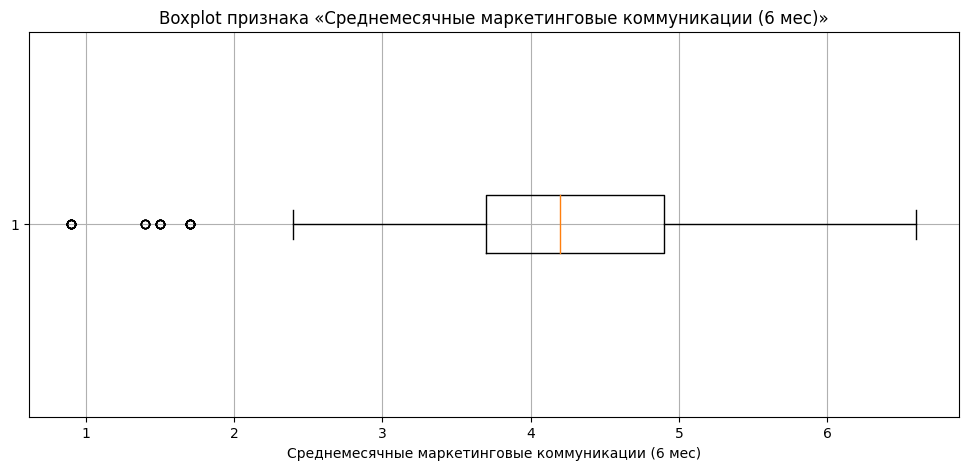

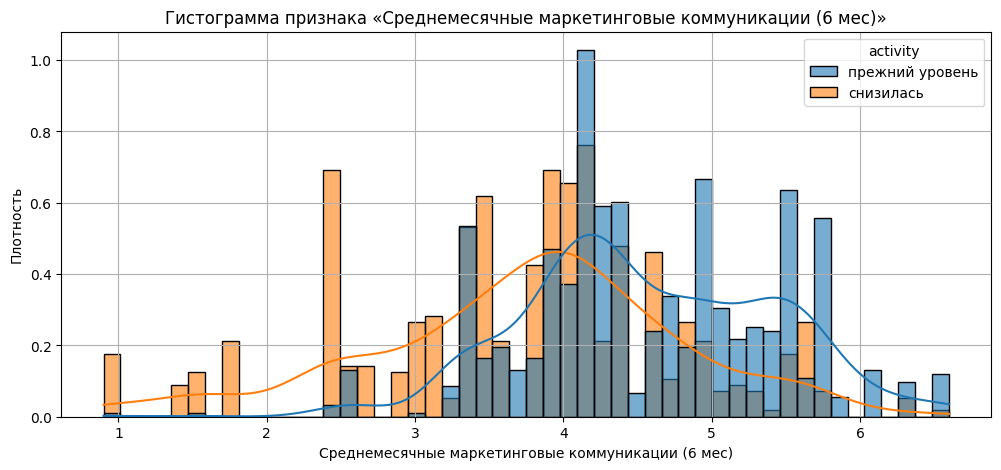

In [18]:
# анализируем столбец 'marketing_6m' (непрерывное значение)
analyze_numeric_column(df=market_file, column='marketing_6m', xlabel='Среднемесячные маркетинговые коммуникации (6 мес)',
      hue='activity')

Признак `marketing_6m` (Среднемесячные маркетинговые коммуникации за 6 мес) не содержит аномальных выбросов — низкие значения отражают клиентов, получавших меньше маркетинговых предложений. При разбиении по таргету видно смещение: у класса «прежний уровень» значения чаще в зоне 4–5, у «снизилась» — 3–4. Перекрытие распределений велико, признак умеренно информативен и сам по себе классы не разделяет. Распределение близко к нормальному, но с несколькими локальными пиками, что может быть связано с особенностями рассылок.

Перейдём к признаку `marketing_current` (маркетинговые коммуникации в текущем месяце).

count    1297.000000
mean        4.009252
std         0.696048
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: marketing_current, dtype: float64

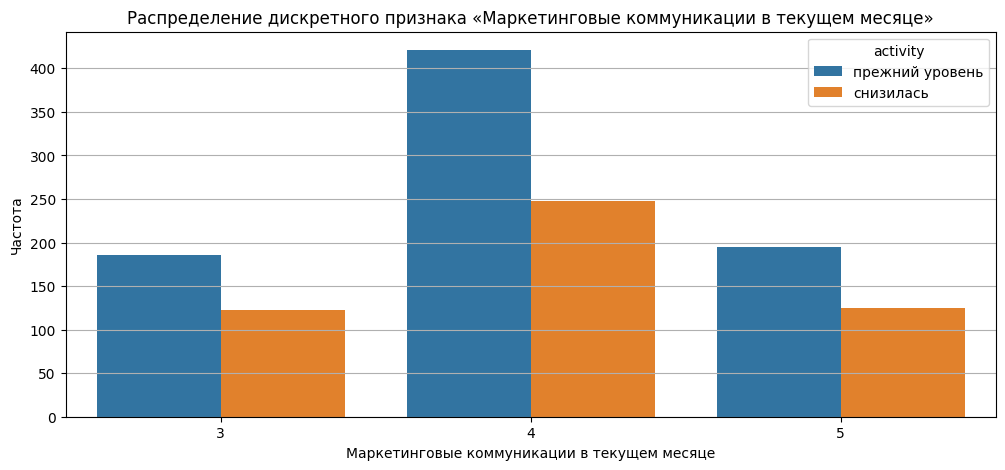

In [19]:
# анализируем столбец 'marketing_current' (целые значения)
analyze_numeric_column(df=market_file, column='marketing_current', xlabel='Маркетинговые коммуникации в текущем месяце',
    discrete=True, hue='activity')

Признак `marketing_current` (Маркетинговые коммуникации в текущем месяце) имеет дискретное распределение с диапазоном значений от 3 до 5, что объясняется фиксированными планами рассылок. Выбросов и аномалий нет. При разбиении по таргету на столбчатой диаграмме видно, что по всем значениям абсолютные счёты у класса «прежний уровень» выше, пик у обоих классов на значении 4; различия формы невелики, признак сам по себе классы не разделяет.

Перейдём к анализу признака `duration_days` (Длительность истории клиента, дни).

count    1297.000000
mean      602.993832
std       249.101456
min       121.000000
25%       410.000000
50%       607.000000
75%       806.000000
max      1079.000000
Name: duration_days, dtype: float64

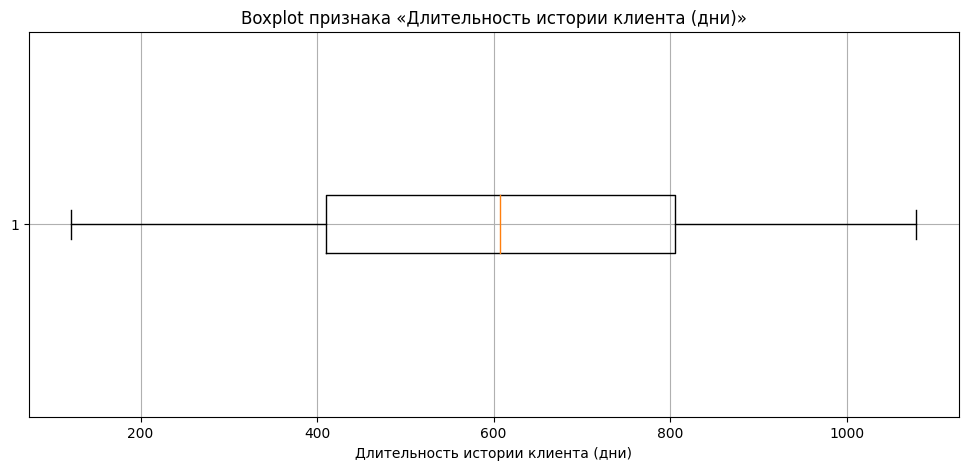

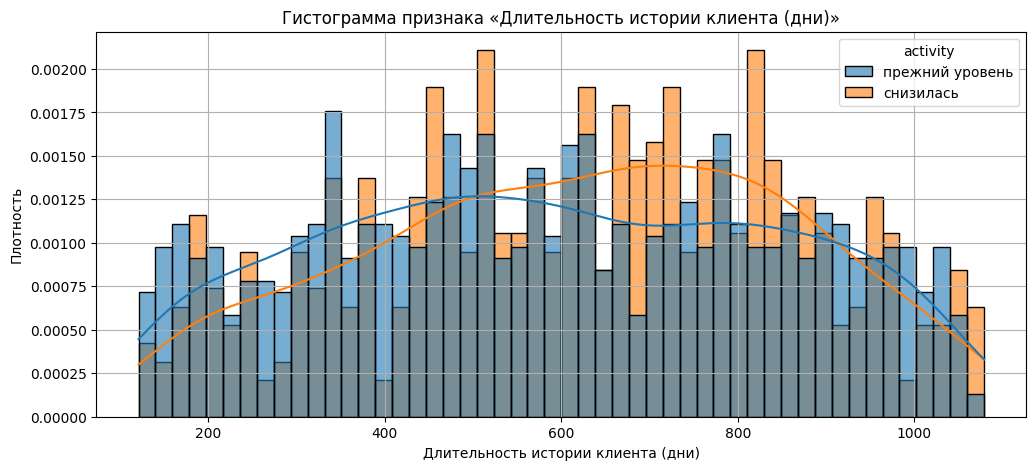

In [20]:
# анализируем столбец 'duration_days' (непрерывное значение)
analyze_numeric_column(df=market_file, column='duration_days', xlabel='Длительность истории клиента (дни)',
    hue='activity')

Признак `duration_days` (Длительность истории клиента, дни) не содержит выбросов. Распределение визуально симметрично, но имеет слегка уплощённую форму и незначительные колебания плотности, поэтому его нельзя назвать идеально нормальным. При разбиении по таргету заметно смещение: у класса «прежний уровень» значения чаще встречаются в зоне \~200–500 дней, у «снизилась» — \~650–900 дней; перекрытие велико, признак умеренно информативен сам по себе.

Перейдём к анализу признака `promo_purchase_share` (Среднемесячная доля покупок по акции за 6 мес).

count    1297.000000
mean        0.320547
std         0.249657
min         0.110000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: promo_purchase_share, dtype: float64

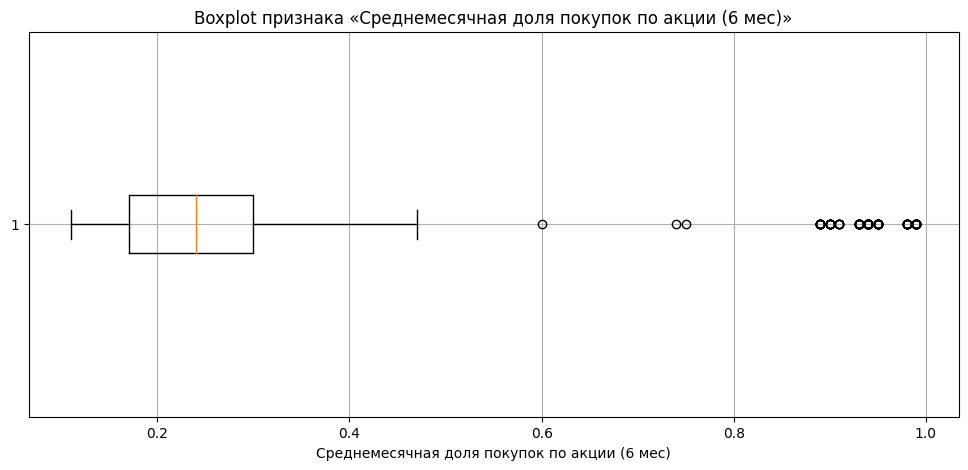

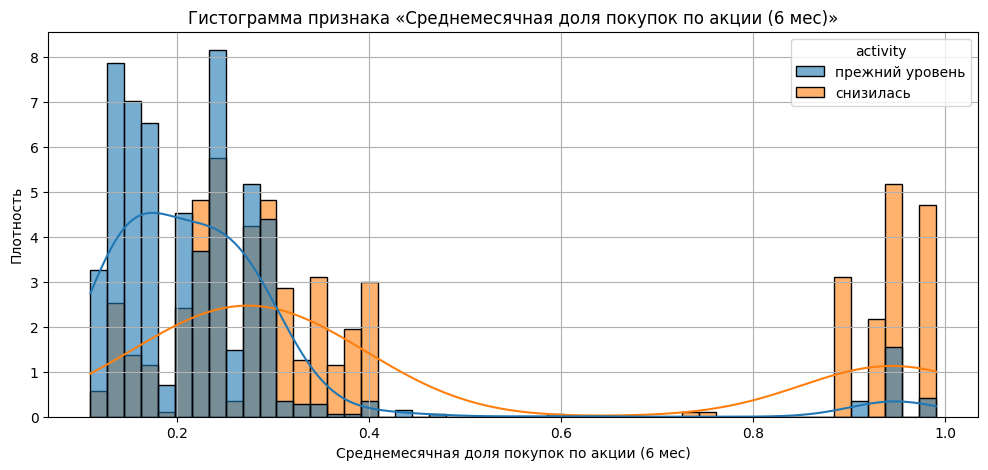

In [21]:
# анализируем столбец 'promo_purchase_share' (непрерывное значение)
analyze_numeric_column(df=market_file, column='promo_purchase_share', xlabel='Среднемесячная доля покупок по акции (6 мес)',
    hue='activity')

Признак `promo_purchase_share` (Среднемесячная доля покупок по акции за 6 мес) имеет ярко выраженную правостороннюю асимметрию. При разбиении по таргету видно, что у класса «снизилась» чаще встречаются высокие доли акционных покупок (включая кластер 0.9–1.0), тогда как у «прежний уровень» значения сконцентрированы в зоне 0.10–0.30. На boxplot заметны правые «выбросы», но это бизнес-валидные наблюдения — клиенты с почти полностью акционными покупками.

Перейдём к анализу признака `avg_categories_per_visit` (Среднее количество категорий товаров за визит).

count    1297.000000
mean        3.267540
std         1.354623
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: avg_categories_per_visit, dtype: float64

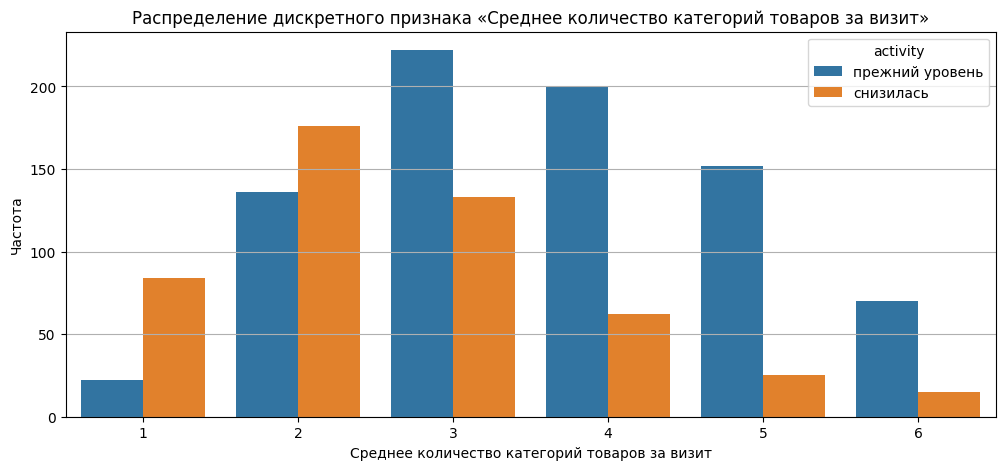

In [22]:
# анализируем столбец 'avg_categories_per_visit' (целые значения)
analyze_numeric_column(df=market_file, column='avg_categories_per_visit', 
   xlabel='Среднее количество категорий товаров за визит', ylabel='Частота', discrete=True, hue='activity')

Признак `avg_categories_per_visit` (Среднее количество категорий товаров за визит) варьируется от 1 до 6, что соответствует общему числу категорий в данных. Распределение дискретное с несколькими локальными пиками: при разбиении по таргету у «прежний уровень» чаще встречаются значения 3–5 (мода 3), у «снизилась» — 1–3 (мода 2). Выбросов не обнаружено.

Перейдём к анализу признака `unpaid_products_q` (Число неоплаченных товаров в корзине за последние 3 месяца).

count    1297.000000
mean        2.841172
std         1.973451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: unpaid_products_q, dtype: float64

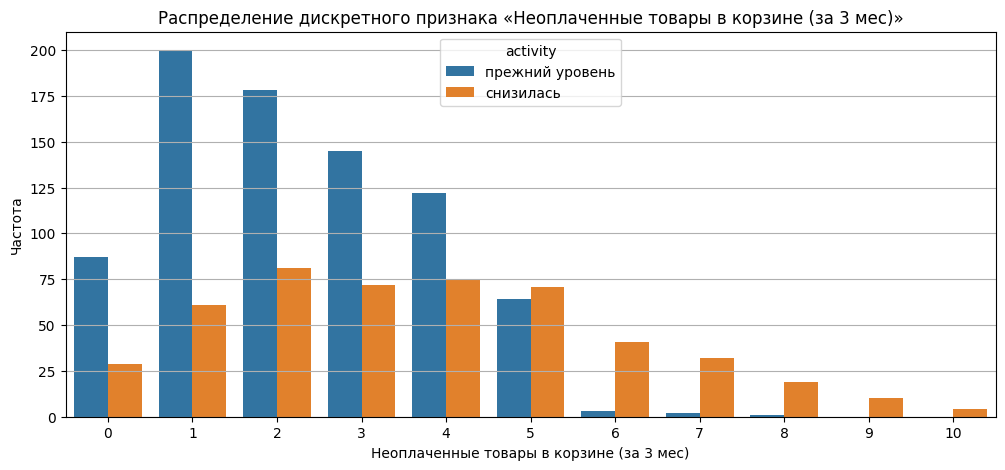

In [23]:
# анализируем столбец 'unpaid_products_q' (целые значения)
analyze_numeric_column(df=market_file, column='unpaid_products_q', xlabel='Неоплаченные товары в корзине (за 3 мес)',
    discrete=True, hue='activity')

Признак `unpaid_products_q` (Неоплаченные товары в корзине за 3 мес) — счётные данные с правосторонним хвостом; распределение напоминает Пуассона. При разбиении по таргету виден сдвиг вправо у класса «снизилась»: у него чаще встречаются значения ≥5, тогда как у «прежний уровень» основная масса лежит в диапазоне 0–4. Явных выбросов не наблюдается; редкие высокие значения бизнес-валидны.

Перейдём к анализу признака `service_failures` (Количество сбоев в обслуживании).

count    1297.000000
mean        4.184271
std         1.950973
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: service_failures, dtype: float64

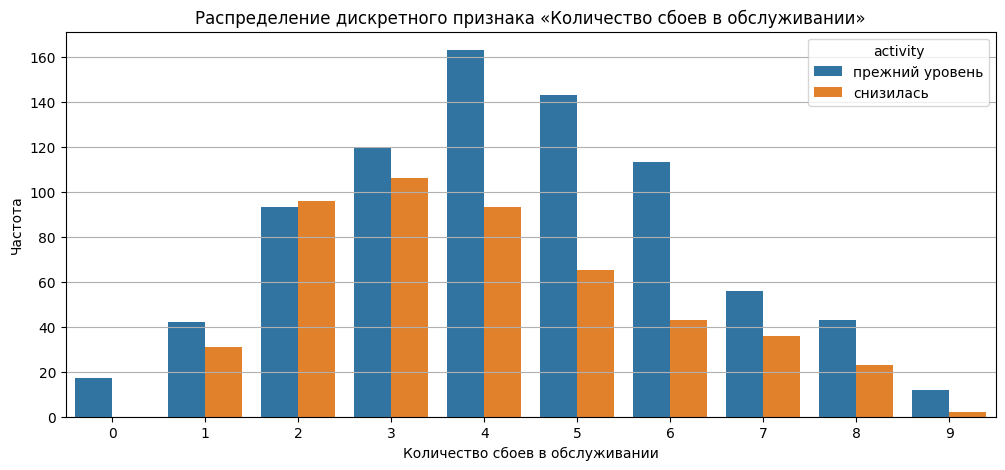

In [24]:
# анализируем столбец 'service_failures' (целые значения)
analyze_numeric_column(df=market_file, column='service_failures', xlabel='Количество сбоев в обслуживании',
    discrete=True, hue='activity')

Признак `service_failures` (Количество сбоев в обслуживании) имеет дискретное распределение; значимых выбросов не наблюдается. Большинство клиентов испытывали от 3 до 6 сбоев. При разбиении по таргету видно, что у класса «прежний уровень» чаще встречаются значения 3–5, у «снизилась» — 2–4; различия умеренные.

Перейдём к анализу признака `pages_per_visit` (Страниц за визит).

count    1297.000000
mean        8.186584
std         3.977061
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: pages_per_visit, dtype: float64

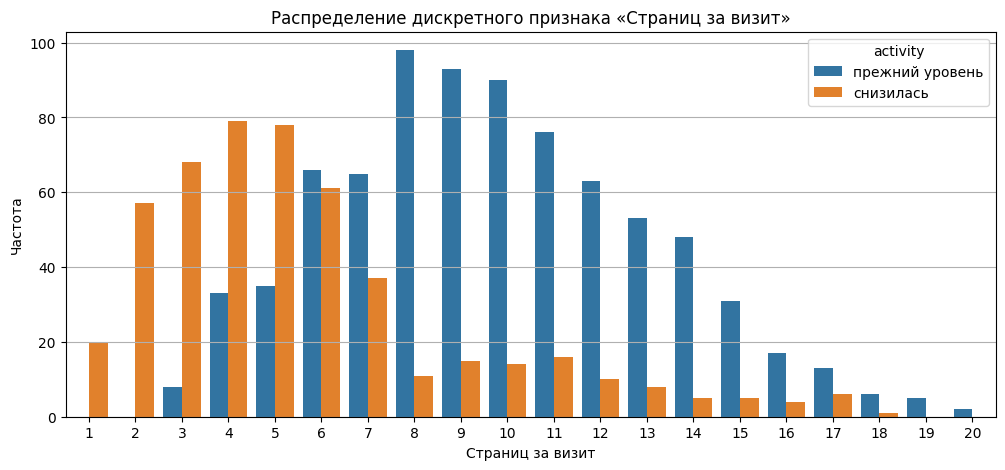

In [25]:
# анализируем столбец 'pages_per_visit' (целые значения)
analyze_numeric_column(df=market_file, column='pages_per_visit', xlabel='Страниц за визит', discrete=True, hue='activity')

Признак `pages_per_visit` (Страниц за визит) имеет распределение, визуально напоминающее распределение Пуассона, без значимых выбросов. Большинство клиентов просматривают от 4 до 11 страниц за визит. При разбиении по таргету видно: у «прежний уровень» чаще встречаются значения 8–11 страниц, у «снизилась» — 3–6 страниц; различия умеренные.

На этом завершаем анализ количественных признаков из первой таблицы `market_file` и переходим к анализу признаков из других таблиц. Начнём со второй таблицы `market_money` и признака `revenue` (Доход). Далее распределения для `market_money` и `market_time` строим отдельно по каждому значению поля `period` (отдельные графики по периодам).

count    1297.000000
mean     4948.339630
std       701.228571
min      2890.000000
25%      4498.500000
50%      5005.500000
75%      5409.000000
max      6869.500000
Name: revenue, dtype: float64

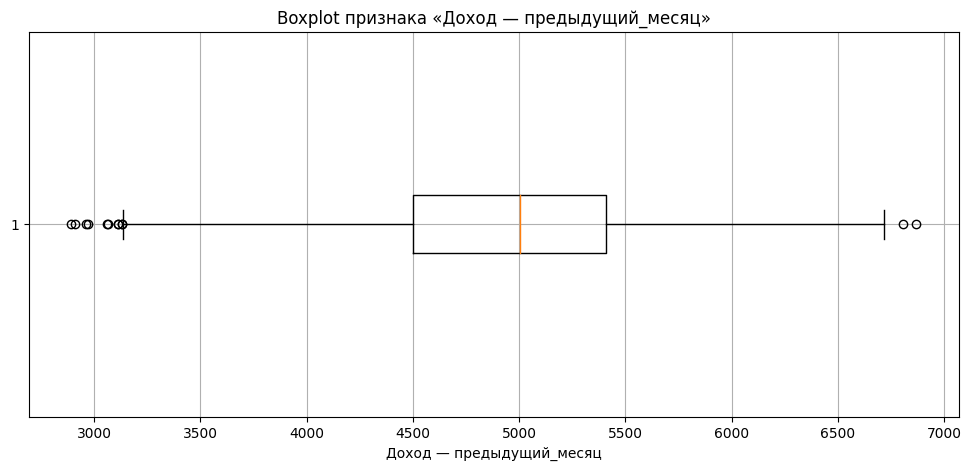

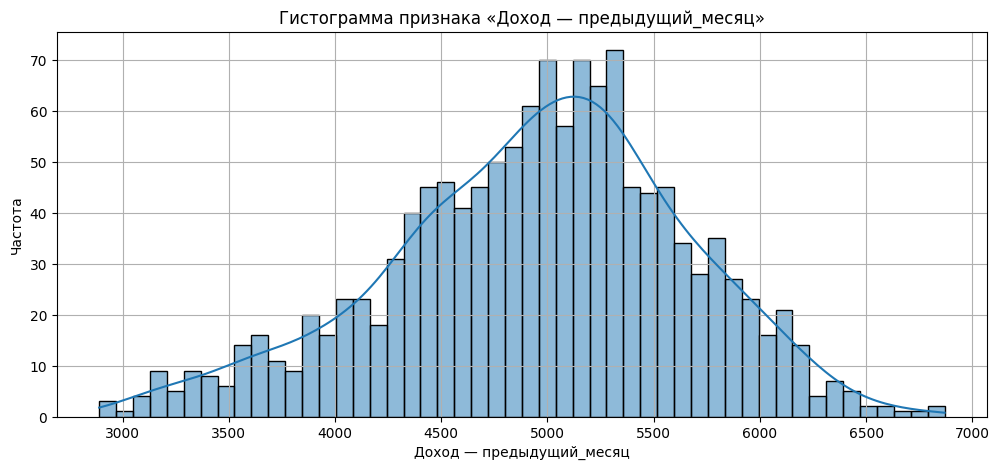

count    1297.000000
mean     4836.367772
std       333.438742
min      4098.000000
25%      4585.000000
50%      4812.000000
75%      5055.000000
max      5663.000000
Name: revenue, dtype: float64

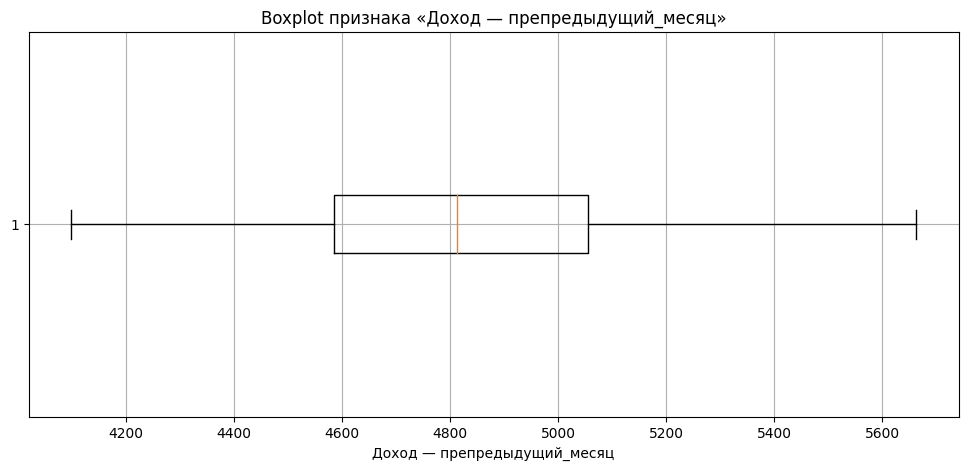

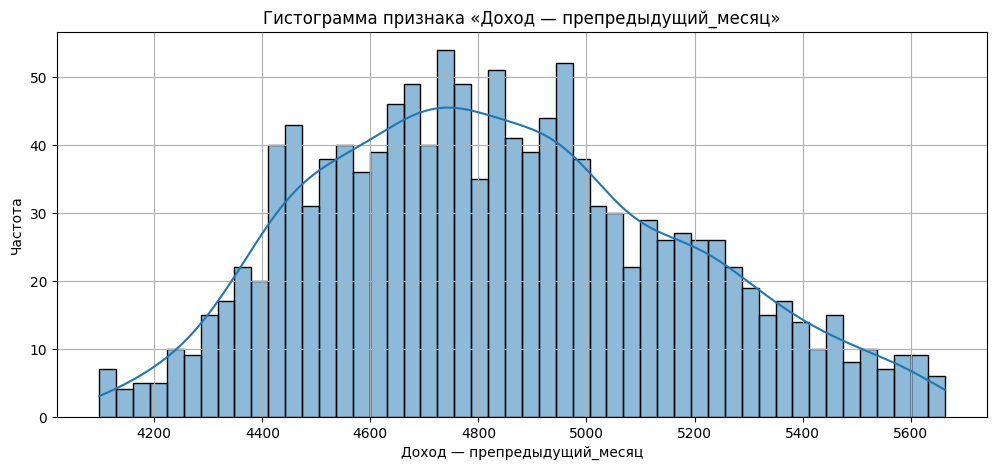

count      1297.000000
mean       5316.449268
std        2942.469139
min        2758.700000
25%        4706.600000
50%        5180.300000
75%        5761.300000
max      106862.200000
Name: revenue, dtype: float64

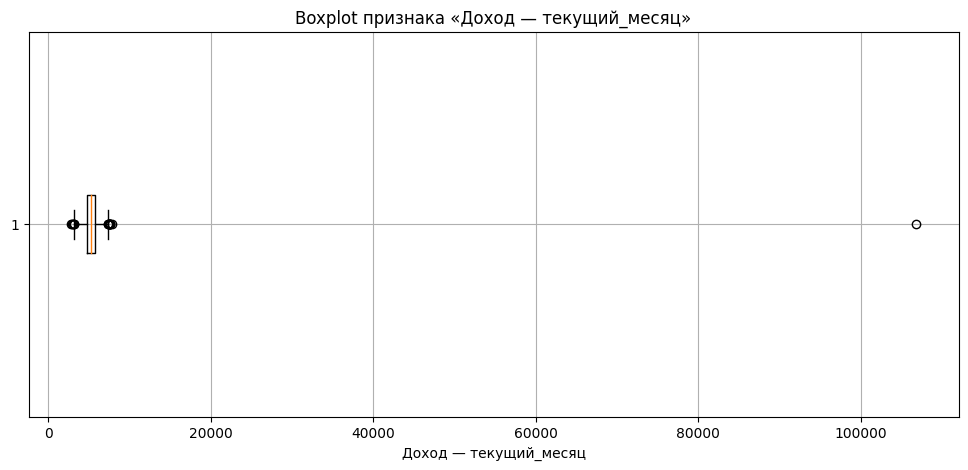

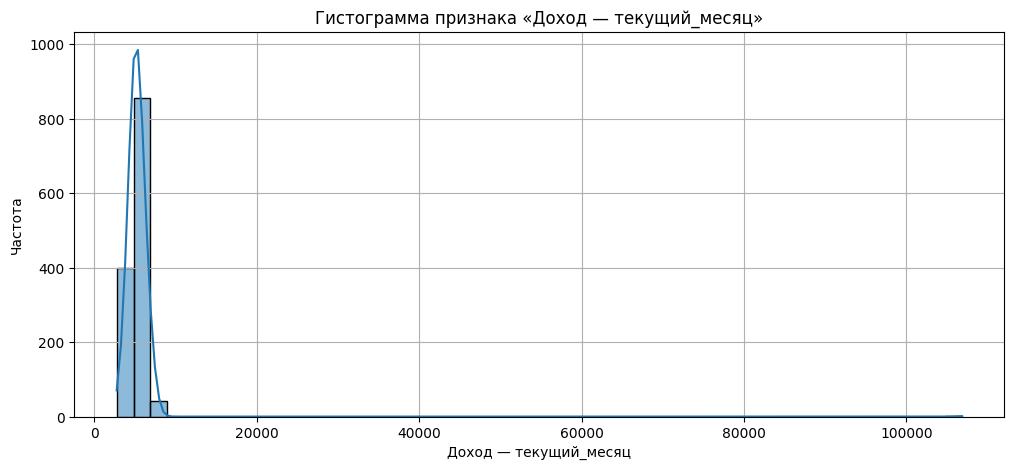

In [26]:
# анализируем столбец 'revenue' (непрерывное значение)
# доход: отдельные графики по каждому периоду
for period, df_p in market_money.groupby('period', sort=True):
    analyze_numeric_column(df=df_p, column='revenue', xlabel=f'Доход — {period}')

При группировке по полю `period` выброс обнаружен только для `текущий_месяц`: значение `106862.2` при типичных значениях \~2800–7800. В других периодах (`предыдущий_месяц`, `предпредыдущий_месяц`) распределение близко к нормальному, крайние значения находятся в разумных границах.

Этот выброс растягивает шкалу и может исказить обучение моделей, поэтому удаляем соответствующую строку (`revenue == 106862.2`). После удаления повторно строим графики — распределения выглядят корректно, новых выбросов нет.

count    1296.000000
mean     5238.096065
std       834.318717
min      2758.700000
25%      4706.050000
50%      5179.950000
75%      5759.275000
max      7799.400000
Name: revenue, dtype: float64

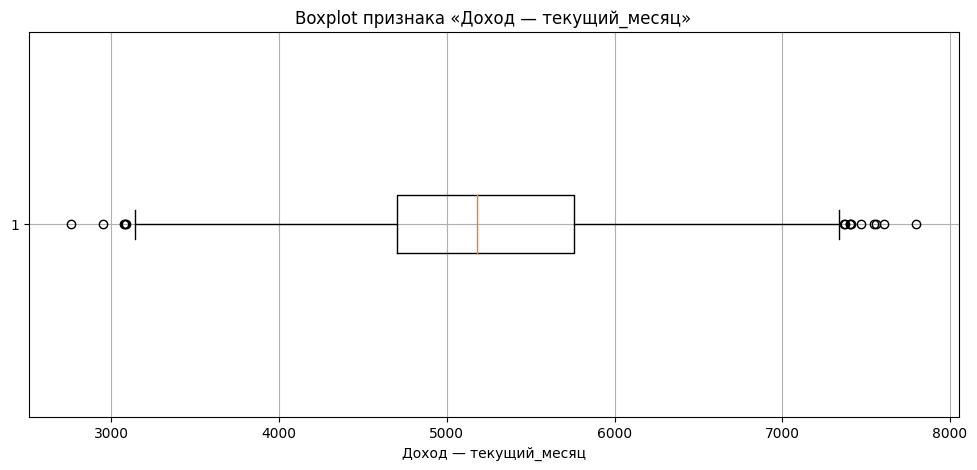

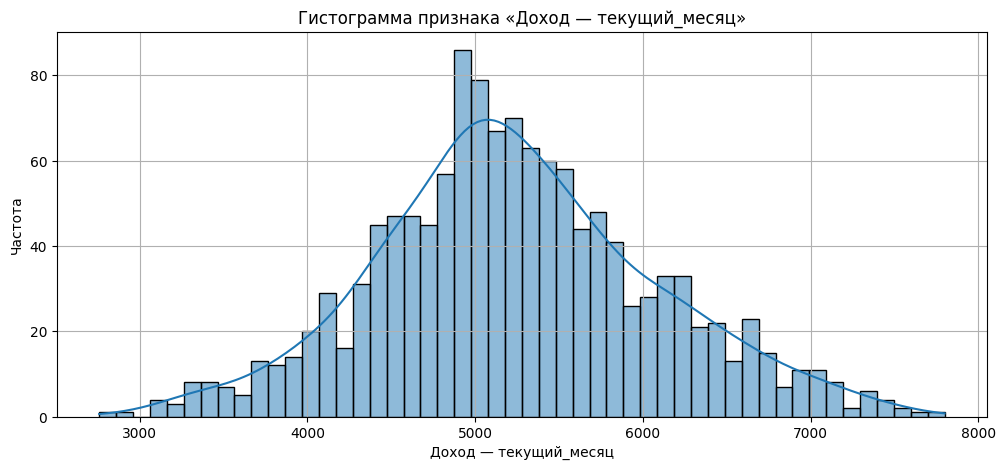

In [27]:
# удаляем выброс в признаке 'revenue' 
market_money = market_money[market_money['revenue'] != 106862.2]

# повторный анализ признака 'revenue' только для 'текущий_месяц'
analyze_numeric_column(df=market_money[market_money['period'] == 'текущий_месяц'], column='revenue',
   xlabel='Доход — текущий_месяц')

Признак `revenue` (Доход) в периоде `текущий_месяц` содержал один явный выброс. После исключения этой записи распределение стало близким к нормальному; редкие значения в хвостах не выглядят проблемными.

Перейдём к анализу признака `minutes` (Время на сайте за период, мин) из таблицы `market_time`.

count    1297.000000
mean       13.469545
std         3.936323
min         5.000000
25%        11.000000
50%        13.000000
75%        17.000000
max        23.000000
Name: minutes, dtype: float64

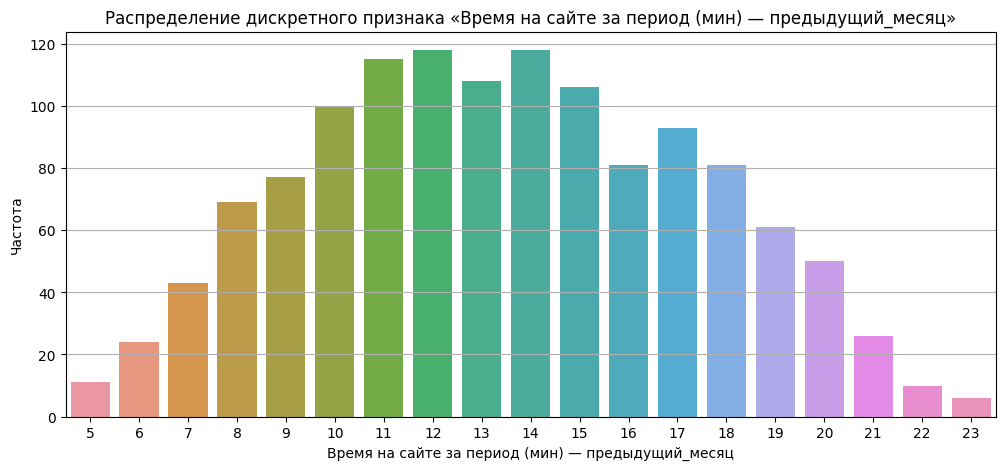

count    1297.000000
mean       13.211257
std         4.220222
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: minutes, dtype: float64

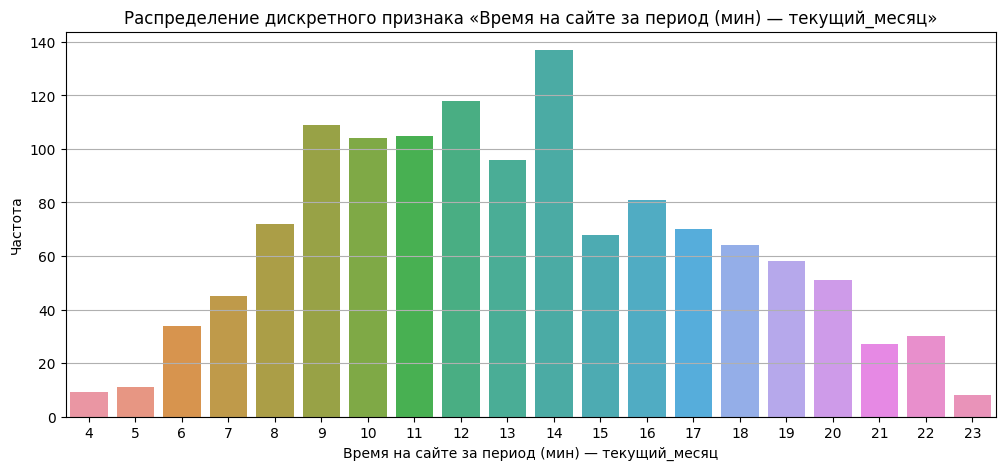

In [28]:
# анализируем столбец 'minutes' (целые значения)
# отдельные графики по каждому периоду
for period, df_p in market_time.groupby('period', sort=True):
    analyze_numeric_column(df=df_p, column='minutes', xlabel=f'Время на сайте за период (мин) — {period}', discrete=True)

Признак `minutes` (Время на сайте за период, мин) имеет распределение, близкое к нормальному, без выраженных выбросов. Значения варьируются от 4-5 до 23 минут, медиана — 13 минут. Распределения построены отдельно по каждому значению `period`; картина в периодах схожая.

Очистим память.

In [29]:
if 'period' in locals():
    del period, df_p
    print('Память очищена!')

Память очищена!


Перейдём к анализу признака `profit` (Прибыль) из таблицы `money`.

count    1297.000000
mean        3.997610
std         1.010813
min         0.860000
25%         3.300000
50%         4.040000
75%         4.670000
max         7.430000
Name: profit, dtype: float64

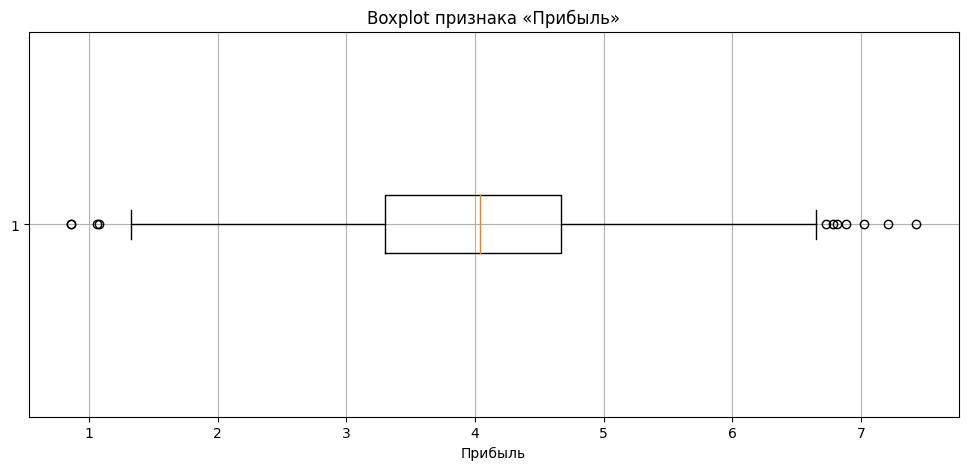

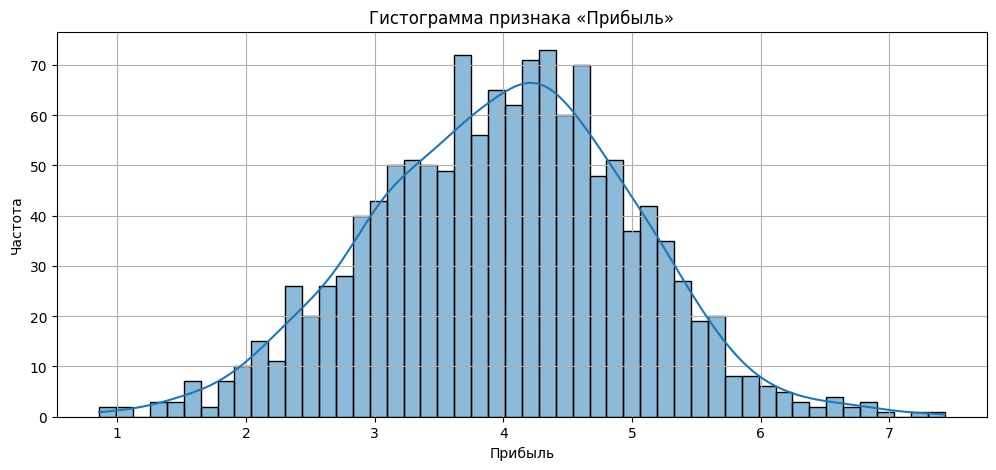

In [30]:
# анализируем столбец 'profit' (непрерывное значение)
analyze_numeric_column(df=money, column='profit', xlabel='Прибыль')

Признак `profit` (Прибыль) распределён близко к нормальному, значимых выбросов не наблюдается. Основная масса значений находится в диапазоне от 3 до 5, медиана — 4.04.

На этом анализ количественных признаков завершён, перейдём к категориальным.

<a name="subtitle2"></a>
### Анализ категориальных признаков

Для анализа категориальных признаков используем вспомогательную функцию `analyze_category_column()`.  
Она выводит таблицу с абсолютными и относительными частотами, а также два горизонтальных графика:
- распределение по количеству наблюдений;
- распределение по доле в процентах.

Дополнительно, при указании параметра `hue` строится столбчатая диаграмма частот с разбиением по заданному столбцу (например, по таргету). Это помогает наглядно оценить структуру признака и вклад классов.

Анализируем признак `activity` (Рассчитанный класс покупательской активности).

category  count  percent
0  прежний уровень    802    61.84
1        снизилась    495    38.16

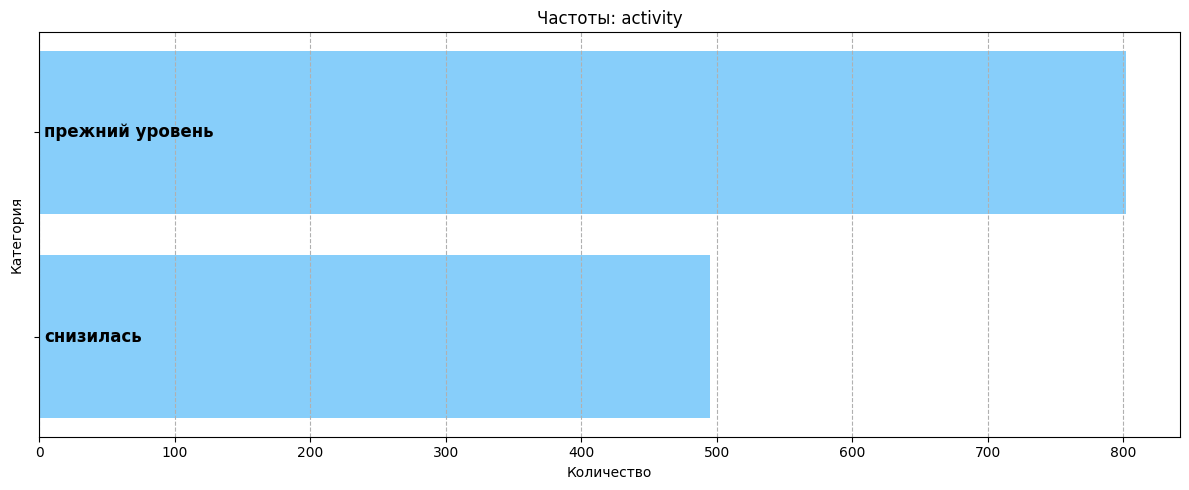

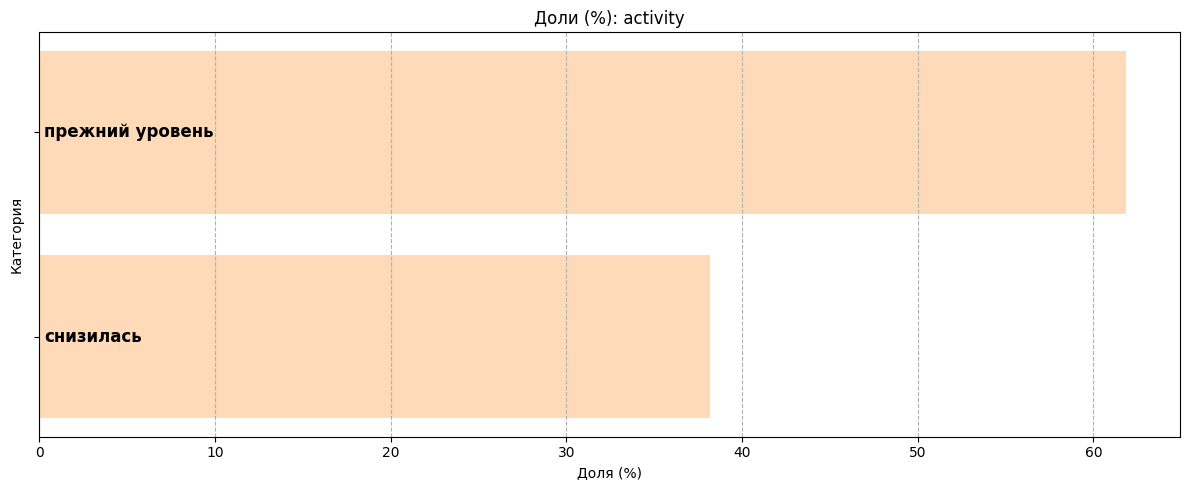

In [31]:
# анализируем столбец 'activity'
analyze_category_column(df=market_file, column='activity');

В данных встречаются две категории. У около 62% покупателей активность осталась на прежнем уровне, а у \~38% — снизилась. Это целевой признак, и хотя дисбаланс умеренный, его важно учитывать при моделировании, особенно при оценке качества классификаторов.  

Перейдём к анализу признака `service_type` (Тип обслуживания).

category  count  percent
0  стандарт    922    71.09
1   премиум    375    28.91

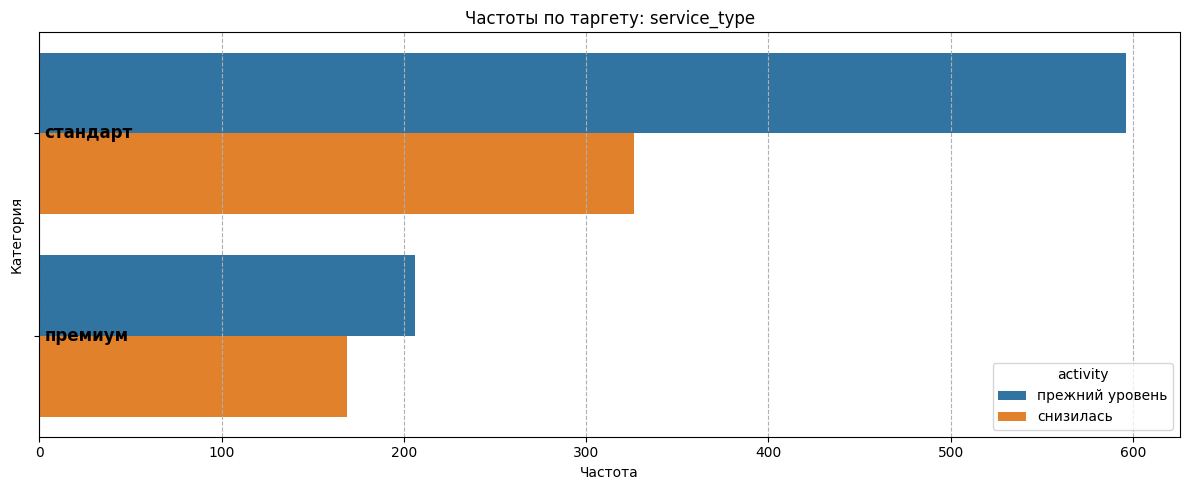

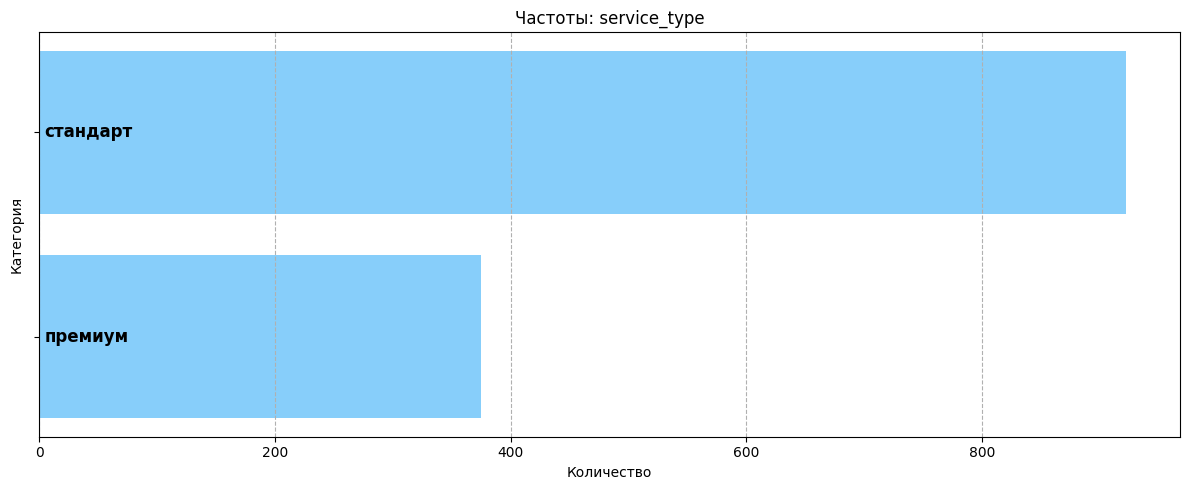

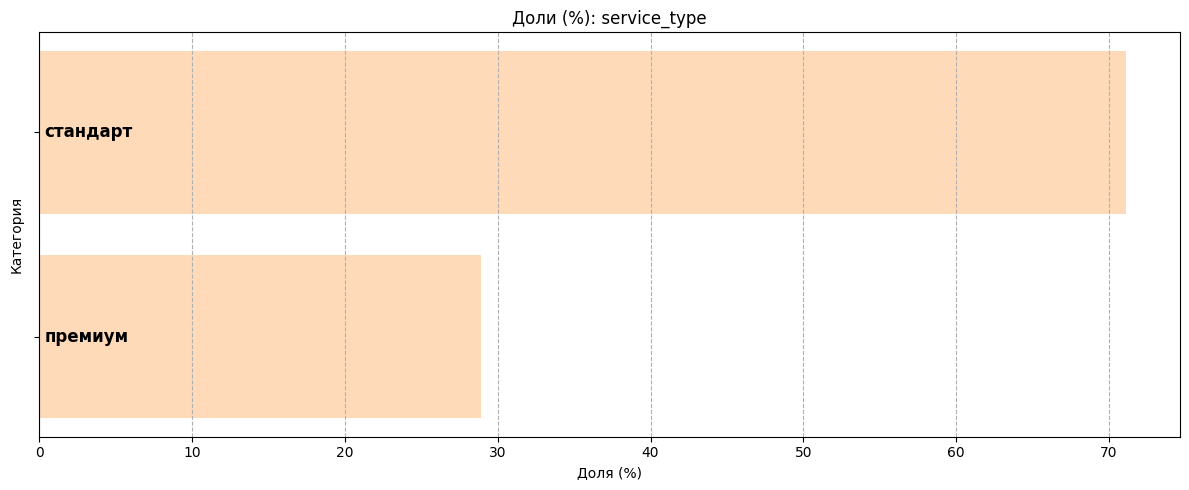

In [32]:
# анализируем столбец 'service_type'
analyze_category_column(market_file, 'service_type', hue='activity');

В данных две категории. Пользователи со стандартным обслуживанием составляют \~71%, с премиум — \~29% (≈1 к 3 в пользу стандартного). При разбиении по таргету видно: в «премиум» доля класса «снизилась» выше (\~45% против \~35% в «стандарт»), то есть премиум-клиенты чаще попадают в группу со снижением активности.

Перейдём к анализу признака `allow_messages` (Разрешение на сообщения).

category  count  percent
0       да    959    73.94
1      нет    338    26.06

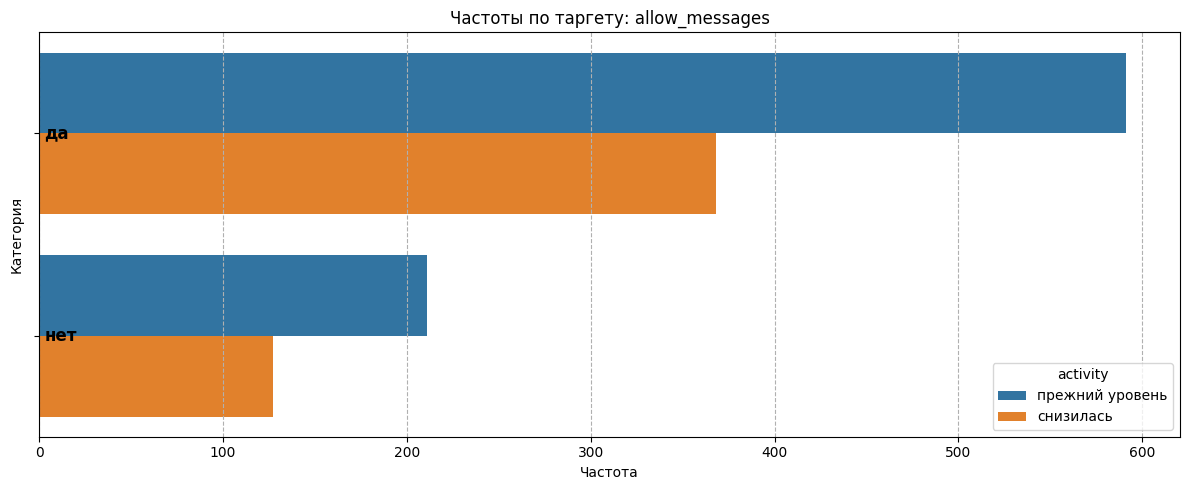

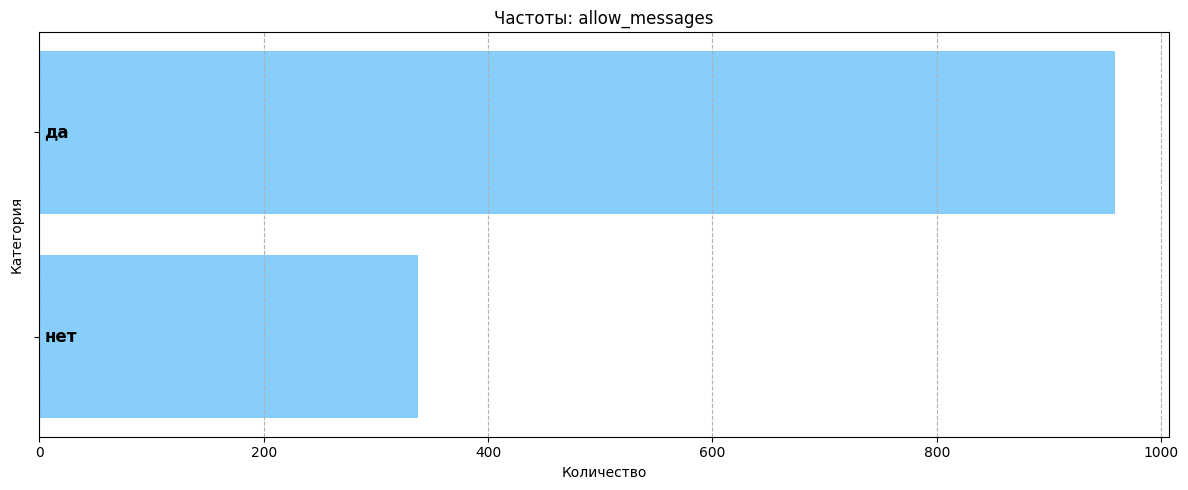

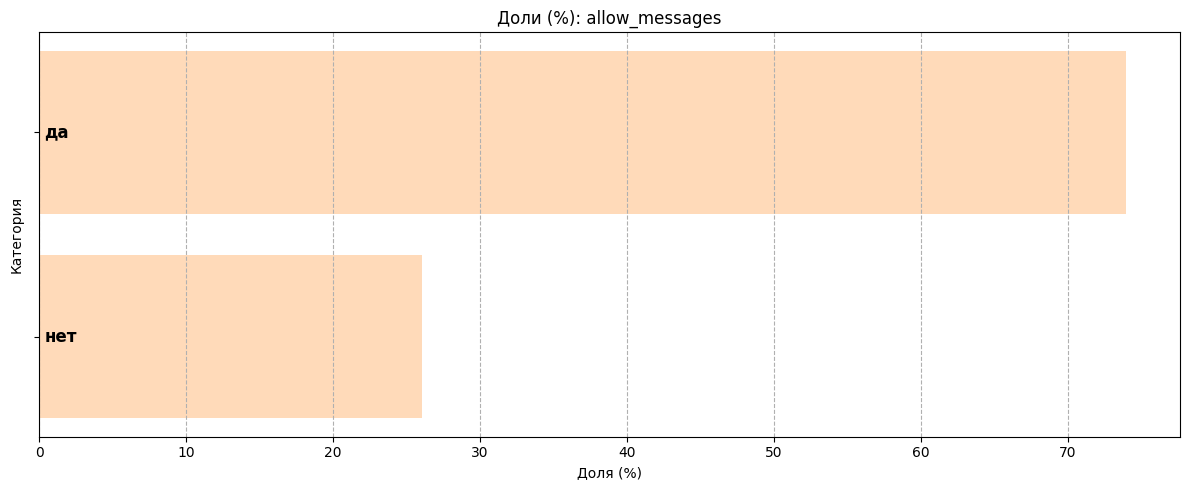

In [33]:
# анализируем столбец 'allow_messages'
analyze_category_column(market_file, 'allow_messages', hue='activity');

В данных две категории. У \~74% пользователей разрешена отправка сообщений, у \~26% — запрещена; соотношение близко к 3 к 1 в пользу разрешения. При разбиении по таргету заметных перекосов нет: в обеих категориях доля «снизилась» примерно 35–40%.

Перейдём к анализу признака `popular_category` (Популярная категория).

category  count  percent
0                      товары для детей    329    25.37
1                     домашний текстиль    250    19.28
2                 косметика и аксесуары    223    17.19
3        техника для красоты и здоровья    183    14.11
4  мелкая бытовая техника и электроника    174    13.42
5                       кухонная посуда    138    10.64

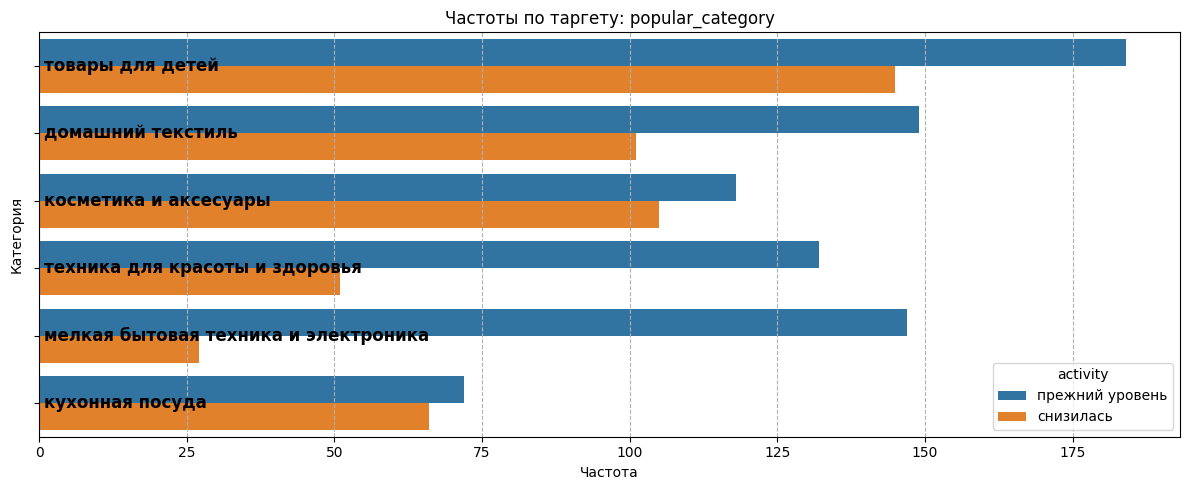

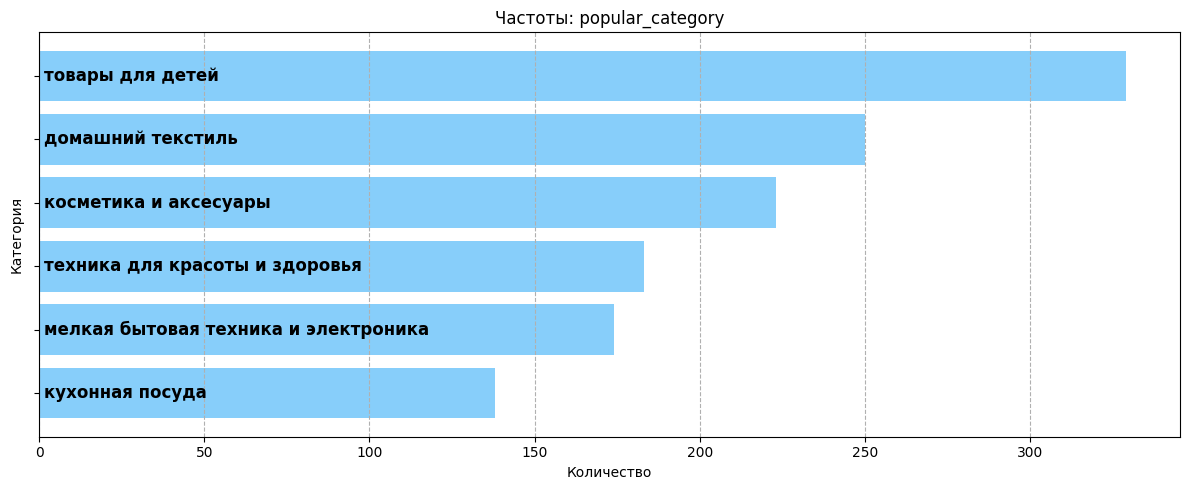

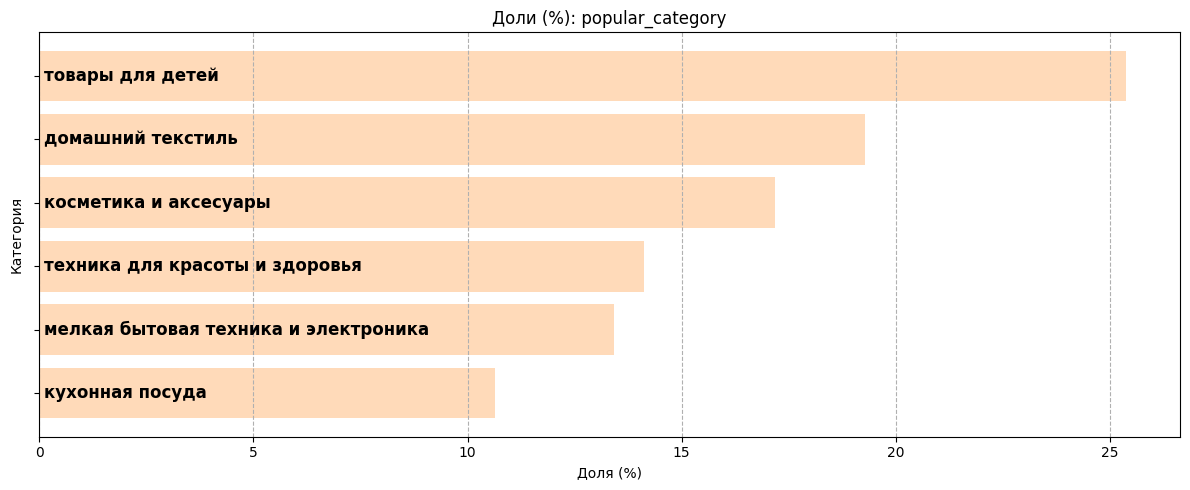

In [34]:
# анализируем столбец 'popular_category'
analyze_category_column(market_file, 'popular_category', hue='activity');

В данных шесть категорий, упорядоченных по популярности. Лидируют «товары для детей» (\~25%), далее «домашний текстиль» (\~19%) и «косметика и аксессуары» (\~17%). Наименее популярна «кухонная посуда» (\~11%).  
По разбиению на таргеты видно: минимальная доля класса «снизилась» у категории «мелкая бытовая техника и электроника» (снижение выражено слабее всего). Выше средней доля снижения у «косметика и аксессуары» и особенно у «кухонная посуда» — здесь класс «снизилась» сопоставим с «прежним уровнем».

Перейдём к анализу признака `period` (Период) в таблице `market_money`.

category  count  percent
0     предыдущий_месяц   1297    33.34
1  препредыдущий_месяц   1297    33.34
2        текущий_месяц   1296    33.32

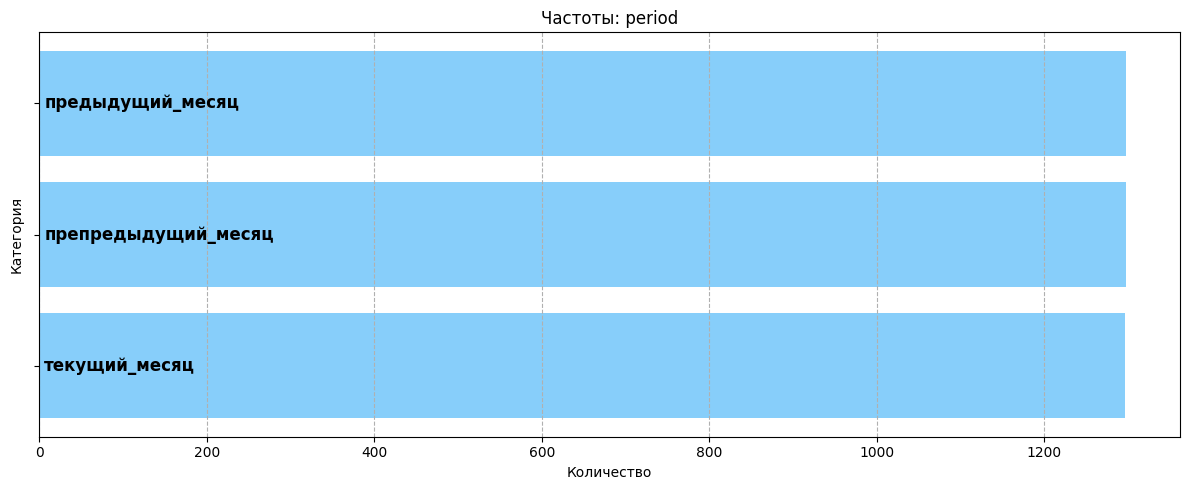

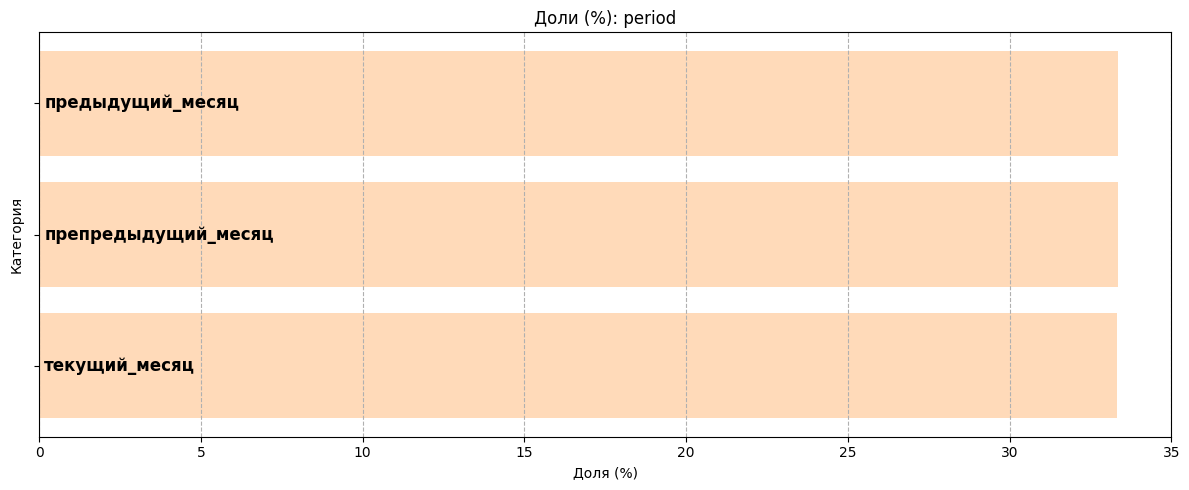

In [35]:
# анализируем столбец 'period'
analyze_category_column(market_money, 'period');

В данных три категории, распределённые почти равномерно (\~33% каждая). Незначительное отставание категории «текущий_месяц» связано с удалением одной записи с аномальным значением дохода.  

Перейдём к анализу признака `period` (Период) в таблице `market_time`.

category  count  percent
0  предыдущий_месяц   1297     50.0
1     текущий_месяц   1297     50.0

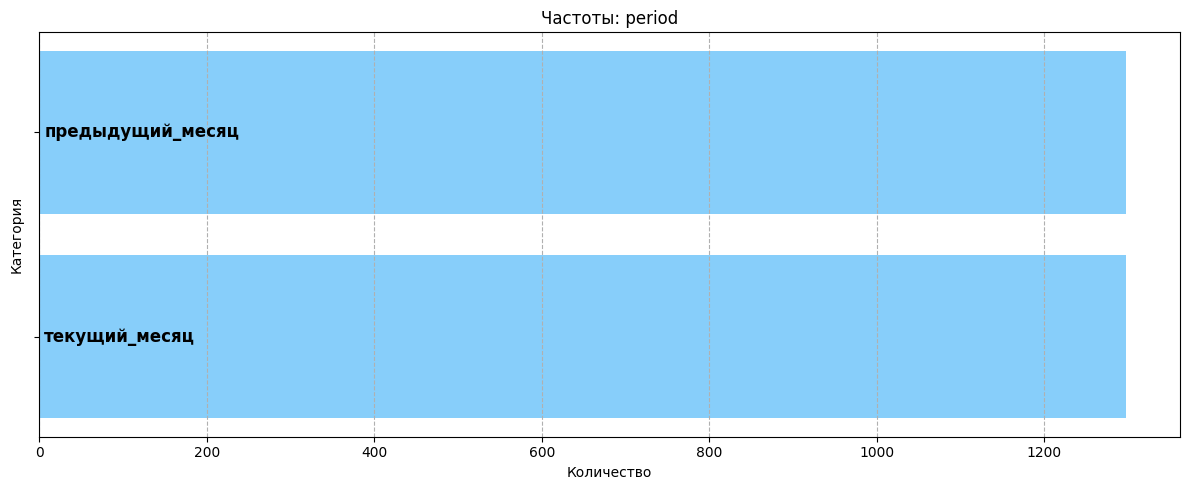

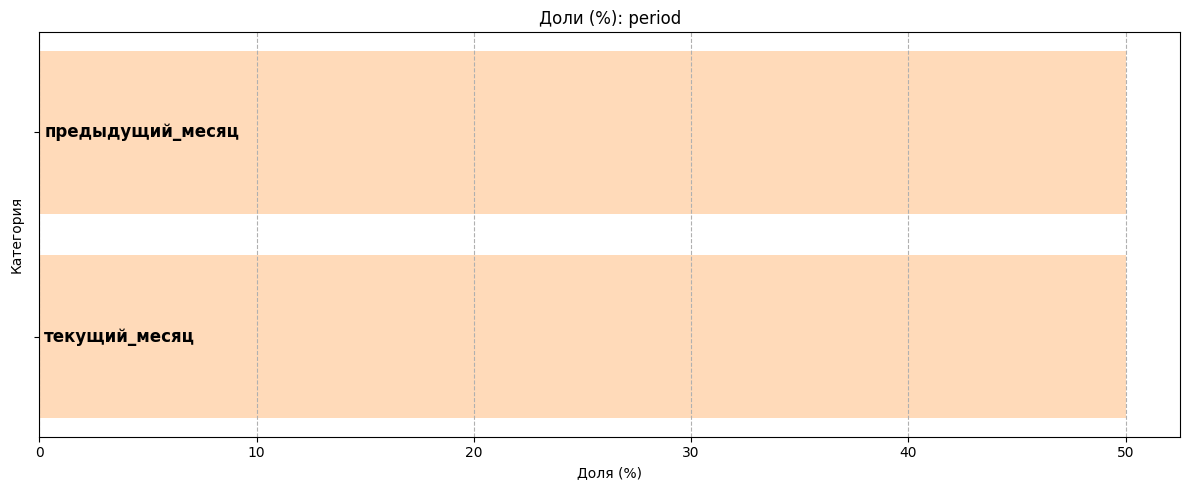

In [36]:
# анализируем столбец 'period'
analyze_category_column(market_time, 'period');

В данных две категории, распределённые равномерно — по 50% каждая. Нарушений или пропусков значений не выявлено.  

На этом анализ категориальных признаков завершён.

Построим интерактивную sunburst-диаграмму (иерархическую круговую диаграмму), чтобы наглядно посмотреть,
как связанные категориальные признаки «вложены» друг в друга и как на нижнем уровне распределяется целевой признак.
Диаграмма позволяет проваливаться по уровням (сервис -> популярная категория -> разрешение на сообщения -> активность)
и сразу видеть доли внутри каждого «родителя».

In [37]:
plot_sunburst(market_file, path=['service_type', 'popular_category', 'allow_messages', 'activity'],
    title='Иерархия: сервис -> категория -> сообщения -> активность')

Очистка и состав выборки
- Удалили 3 неактивных клиента (выручка > 0 не во всех трёх месяцах); во всех таблицах осталось 1297 id.
- В `market_money` удалили единичный выброс `revenue = 106862.2`; после этого распределение стало стабильным. Из-за удаления в категории `текущий_месяц` стало на одну запись меньше.

Количественные признаки

`market_file`  
- `marketing_6m` — близко к нормальному, без выбросов; низкие значения отражают клиентов с меньшим числом предложений; есть несколько локальных пиков. При разбиении по таргету: у «прежний уровень» чаще 4–5, у «снизилась» — 3–4; распределения сильно перекрываются.  
- `marketing_current` — дискретный диапазон 3–5 (три уникальных значения), выбросов нет. По таргету: во всех значениях абсолютные счёты выше у «прежний уровень», пик у обоих на 4.  
- `duration_days` — визуально почти симметричен, слегка уплощён; без выбросов. При разбиении по таргету заметно смещение: у класса «прежний уровень» значения чаще встречаются в зоне \~200–500 дней, у «снизилась» — \~650–900 дней.  
- `promo_purchase_share` — ярко выраженная правая асимметрия: масса в 0.10–0.30, есть кластер почти полностью «акционных» клиентов (>0.9); без выбросов. По таргету: у «снизилась» заметен хвост к 0.9–1.0, у «прежний уровень» значения в основном 0.1–0.3.  
- `avg_categories_per_visit` — от 1 до 6 (что соответствует числу категорий); без выбросов. По таргету: «снизилась» чаще 1–3, «прежний уровень» — 3–5.  
- `unpaid_products_q` — счётные данные, форма близка к пуассоновской; без явных выбросов. По таргету: у «снизилась» чаще крупные значения (5+), у «прежний уровень» — 0–4.  
- `service_failures` — примерно нормальное распределение, большинство значений 3–6; без выбросов. По таргету: у «прежний уровень» небольшой сдвиг к 3–5, различия умеренные.  
- `pages_per_visit` — форма, близкая к пуассоновской; без значимых выбросов. По таргету: у «прежний уровень» чаще 8–11 страниц, у «снизилась» — 3–6.

`market_money`  
- `revenue` — после удаления единичного выброса распределение по всем трём периодам близко к нормальному; редкие значения в хвостах выглядят допустимо.

`market_time`  
- `minutes` — близко к нормальному по обоим периодам, без выраженных выбросов; диапазон 4/5–23 мин, медиана — 13.

`money`  
- `profit` — близко к нормальному, значимых выбросов нет; основная масса 3–5, медиана — 4.04.

Категориальные признаки

`market_file`  
- `activity` — «прежний уровень» 61.84%, «снизилась» 38.16% (целевой признак).  
- `service_type` — «стандарт» 71.09%, «премиум» 28.91%. По таргету: в «премиум» доля «снизилась» выше, чем в «стандарте».  
- `allow_messages` — «да» 73.94%, «нет» 26.06%. По таргету: у отключивших сообщения доля «снизилась» немного выше.  
- `popular_category` — градация по популярности: «товары для детей» 25.37% → «домашний текстиль» 19.28% → «косметика и аксессуары» 17.19% → «техника для красоты и здоровья» 14.11% → «мелкая бытовая техника и электроника» 13.42% → «кухонная посуда» 10.64%. По таргету: минимальное падение доли — в «мелкой бытовой технике и электронике».

`market_money`  
- `period` — почти равномерно по трём категориям (\~33% каждая); в `текущий_месяц` на одну запись меньше из-за удаления выброса.

`market_time`  
- `period` — 50/50 между `текущий_месяц` и `предыдущий_месяц`.

Дополнительно
- Для наглядного просмотра иерархий категорий построена интерактивная sunburst-диаграмма (сервис -> категория -> сообщения -> активность), что помогает быстро увидеть, в каких ветках доля класса «снизилась» выше или ниже.

Вывод
- Существенных проблем в распределениях не обнаружено. Количественные признаки в основном без выбросов; встречаются ожидаемые формы (почти нормальные и счётные/пуассоновские).  
- По таргету видны разумные смещения: больше «снижения» у клиентов с меньшими коммуникациями (`marketing_6m`), высокой долей акционных покупок (`promo_purchase_share`), меньшим числом просмотренных страниц (`pages_per_visit`) и большим числом неоплаченных товаров (`unpaid_products_q`); различия по ряду признаков умеренные и с сильным перекрытием распределений.  
- Целевой признак `activity` имеет умеренный дисбаланс (62% / 38%); это учитываем на этапе предобработки и при валидации моделей.

<a name="title4"></a>
## Объединение таблиц

Объединяем таблицы `market_file`, `market_money` и `market_time` по полю `id`.  
Данные о прибыли из `money` не использовались, так как они не нужны для моделирования.  
Показатели выручки (`revenue`) и времени на сайте (`minutes`), изначально представленные в разрезе периодов в одном столбце, развернули в отдельные столбцы для каждого периода.  
В `market_time` отсутствуют данные за `препредыдущий_месяц`, поэтому после объединения столбец `minutes_препредыдущий_месяц` содержал только `NaN` и был удалён как не несущий полезной информации.

In [38]:
# объединяем market_money и market_time по id и period, сохраняя все периоды из market_money
money_time = market_money.merge(market_time, on=['id', 'period'], how='left')

# разворачиваем revenue и minutes по периодам
money_time_pivot = money_time.pivot(index='id', columns='period', values=['revenue', 'minutes']).reset_index()

# переименовываем столбцы для наглядности
money_time_pivot = flatten_pivot_columns(money_time_pivot)

# удаляем столбец minutes_препредыдущий_месяц, если он есть
if 'minutes_препредыдущий_месяц' in money_time_pivot.columns:
    money_time_pivot.drop(columns=['minutes_препредыдущий_месяц'], inplace=True)

# объединяем с market_file по id
final_df = market_file.merge(money_time_pivot, on='id')

# проверяем результат
final_df.head()

id   activity service_type allow_messages  marketing_6m  \
0  215349  снизилась      премиум             да           4.4   
1  215350  снизилась     стандарт            нет           4.9   
2  215351  снизилась     стандарт             да           3.2   
3  215352  снизилась     стандарт            нет           5.1   
4  215353  снизилась     стандарт             да           3.3   

   marketing_current  duration_days  promo_purchase_share   popular_category  \
0                  4            819                  0.75   товары для детей   
1                  3            539                  0.14  домашний текстиль   
2                  5            896                  0.99   товары для детей   
3                  3           1064                  0.94   товары для детей   
4                  4            762                  0.26  домашний текстиль   

   avg_categories_per_visit  unpaid_products_q  service_failures  \
0                         4                  4                 2   
1                         5                  2                 1   
2                         5                  0                 6   
3                         3                  2                 3   
4                         4                  1                 1   

   pages_per_visit  revenue_предыдущий_месяц  revenue_препредыдущий_месяц  \
0                5                    5216.0                       4472.0   
1                5                    5457.5                       4826.0   
2                4                    6158.0                       4793.0   
3                2                    5807.5                       4594.0   
4                4                    4738.5                       5124.0   

   revenue_текущий_месяц  minutes_предыдущий_месяц  minutes_текущий_месяц  
0                 4971.6                      12.0                   10.0  
1                 5058.4                       8.0                   13.0  
2                 6610.4                      11.0                   13.0  
3                 5872.5                       8.0                   11.0  
4                 5388.5                      10.0                   10.0

Очистим память. Таблица `money` ещё будет использована позднее, поэтому не удаляется.  
Также оптимизируем расход памяти в итоговом датафрейме `final_df`.

In [39]:
# очистка памяти
if 'money_time' in locals():
    del money_time, money_time_pivot
    del market_file, market_money, market_time
    print('Память очищена!')

# оптимизация расхода памяти в итоговом датафрейме
final_df = optimize_memory_usage(final_df)

Память очищена!
Размер использования памяти: до  0.15 мб — после  0.06 мб (58.7%)


На этапе объединения данных были собраны таблицы `market_file`, `market_money` и `market_time` по полю `id`. Данные о прибыльности из `money` на этом шаге не использовались, так как они не требовались для построения модели.  

Показатели выручки (`revenue`) и времени на сайте (`minutes`), изначально представленные в одном столбце для всех периодов, были развернуты в отдельные столбцы по каждому периоду с помощью метода `pivot()`.  

Столбец `minutes_препредыдущий_месяц` содержал только пропуски, поэтому был удалён как не несущий полезной информации.  

В результате получена единая таблица для моделирования с объединёнными поведенческими, финансовыми и временными характеристиками клиентов.

<a name="title5"></a>
## Корреляционный анализ

Проведём корреляционный анализ признаков в финальной таблице для моделирования.  

Так как не все количественные признаки имеют нормальное распределение, для анализа используем коэффициент корреляции Спирмена — он устойчив к выбросам и отклонениям от нормальности. Это позволит корректно выявить монотонные зависимости и оценить мультиколлинеарность в числовых данных.  

Затем построим матрицу корреляций `phi_k` для всех признаков, включая категориальные. Хотя `phi_k` формально вне рамок задания проекта, но может быть полезна для дальнейшего улучшения качества итоговой модели.  

Порог для существенной мультиколлинеарности 0.9.  

Также уберём `id` из анализа, сделав его индексом. Это не влияет на результаты корреляций, но позволит сохранить информацию для возможного объединения с другими выборками.

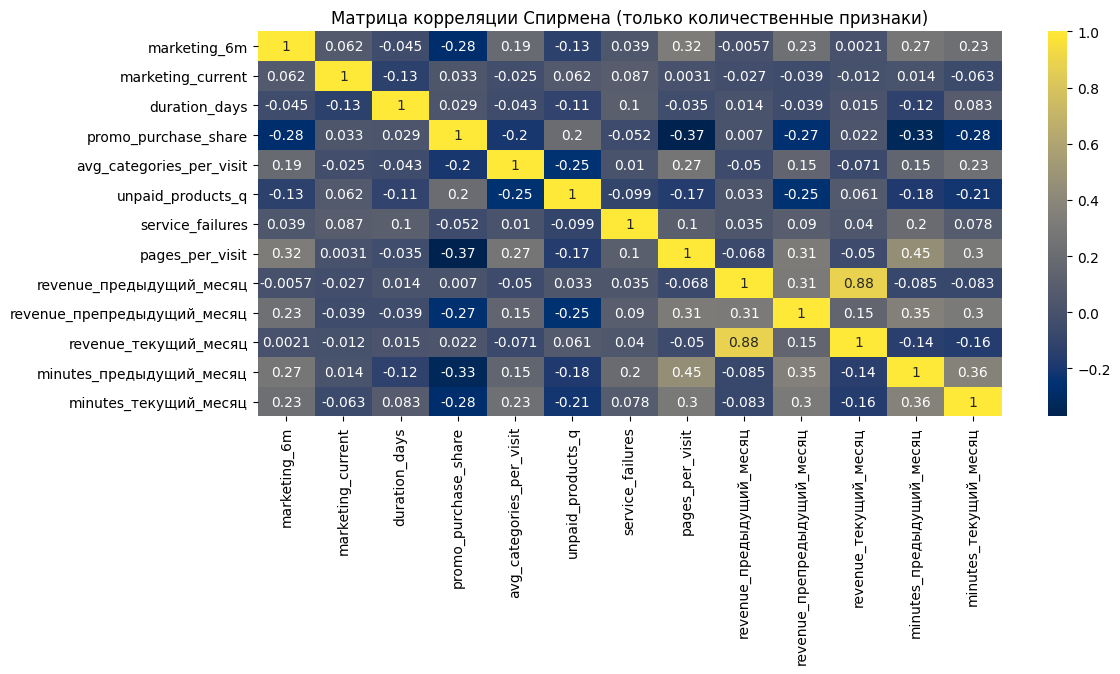

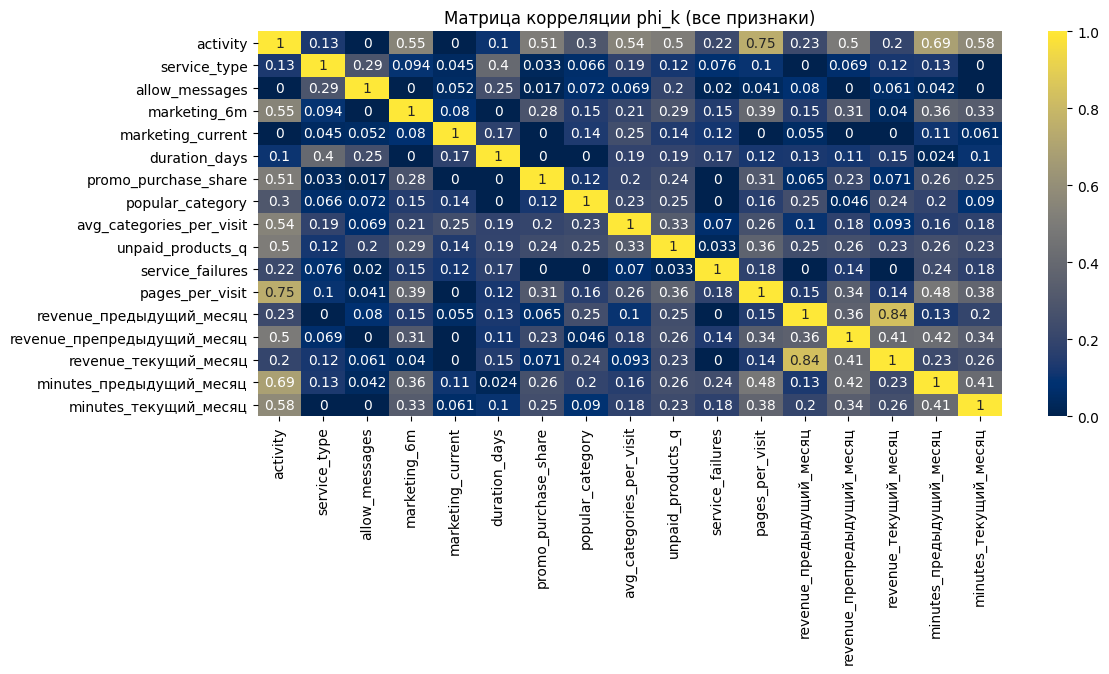

In [40]:
# делаем id индексом, чтобы он не участвовал в анализе
if 'id' in final_df.columns:
    final_df = final_df.set_index('id')

# список числовых столбцов
numeric_cols = get_columns_by_types(final_df, kinds=('i', 'f'))

# корреляция спирмена по числовым
plt.figure(figsize=(12, 5))
sns.heatmap(final_df[numeric_cols].corr(method='spearman'), annot=True, cmap='cividis')
plt.title('Матрица корреляции Спирмена (только количественные признаки)')
plt.show()

# phi_k по всем признакам (числовые как interval_cols) — вне рамок задания, для повышения качества модели
phik_corr = final_df.phik_matrix(interval_cols=numeric_cols)
plt.figure(figsize=(12, 5))
sns.heatmap(phik_corr, annot=True, cmap='cividis')
plt.title('Матрица корреляции phi_k (все признаки)')
plt.show()

По результатам анализа мультиколлинеарности:  

- В матрице корреляции Спирмена для количественных признаков значения не превышают порог 0.9, значит сильной мультиколлинеарности в числовых данных нет.  
- Матрица phi_k показала несколько умеренных связей между категориальными и числовыми признаками, но также без критических значений.  

Таким образом, признаки сохраняем без удаления.  

Для детального анализа связей между признаками построим дополнительные `scatterplot`:

1. Диаграмма рассеяния между выручкой за текущий и предыдущий месяц.

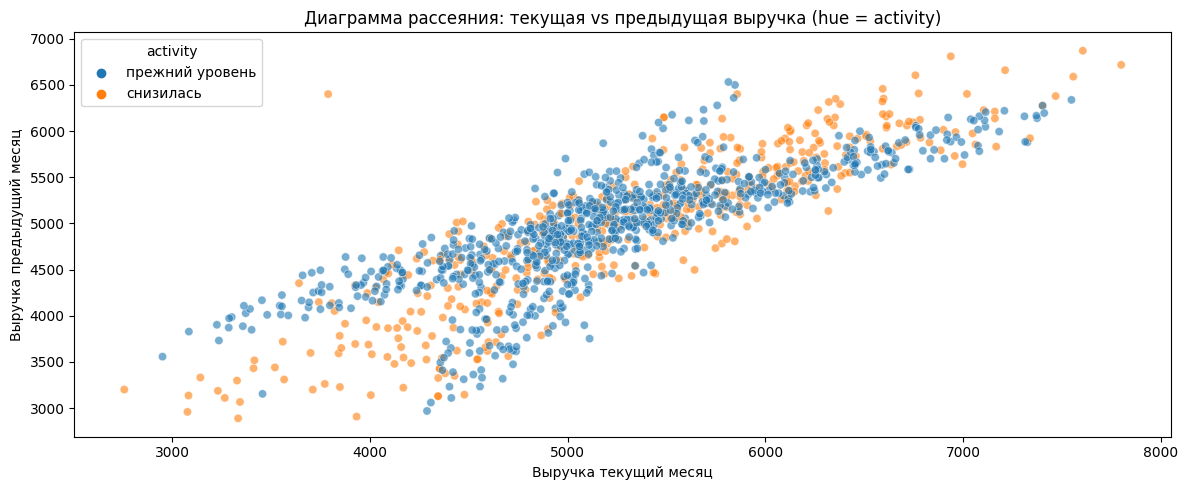

In [41]:
# диаграмма: текущая vs предыдущая выручка (hue по 'activity')
plot_scatter_with_hue(final_df, x_col='revenue_текущий_месяц', y_col='revenue_предыдущий_месяц', hue='activity',
    xlabel='Выручка текущий месяц', ylabel='Выручка предыдущий месяц', 
    title='Диаграмма рассеяния: текущая vs предыдущая выручка (hue = activity)')

Проверим, объясняют ли две «прямые» (прямая и крест) на scatter plot категориальные признаки. Построим те же диаграммы (текущая vs предыдущая выручка) с раскраской по:

- `service_type`
- `allow_messages`

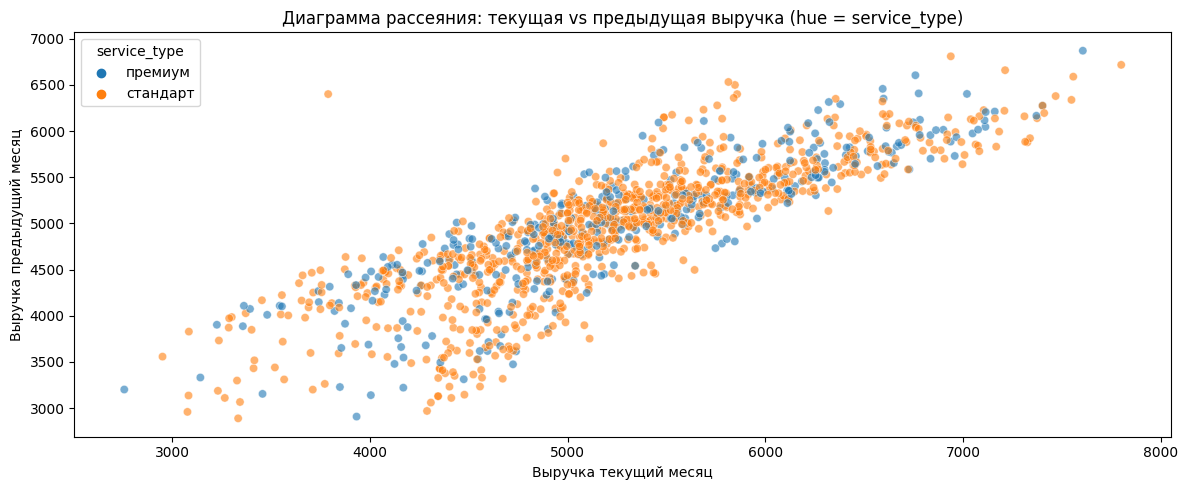

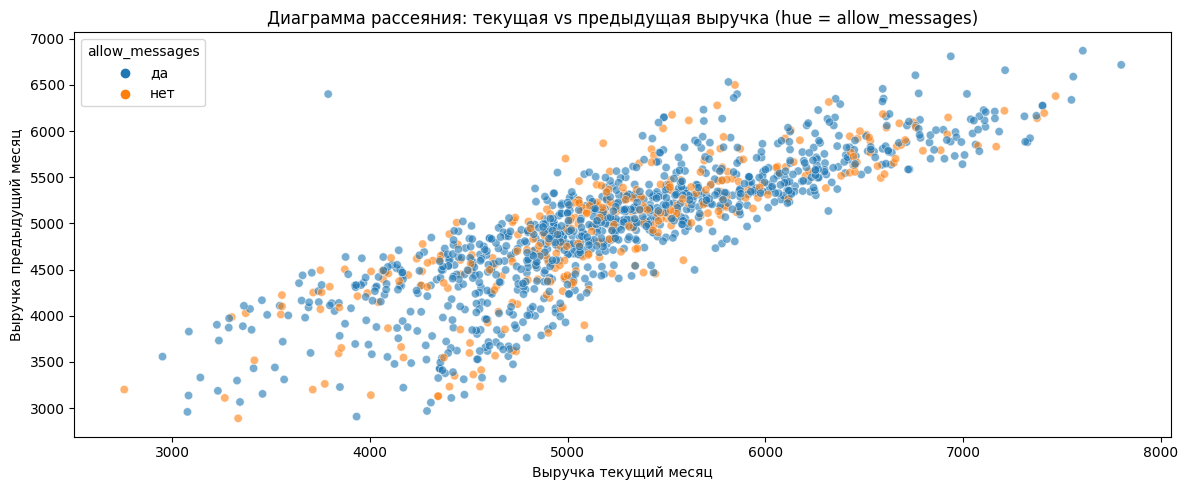

In [42]:
# 1) текущая vs предыдущая выручка, hue = service_type
plot_scatter_with_hue(final_df, x_col='revenue_текущий_месяц', y_col='revenue_предыдущий_месяц', hue='service_type',
    xlabel='Выручка текущий месяц', ylabel='Выручка предыдущий месяц', 
    title='Диаграмма рассеяния: текущая vs предыдущая выручка (hue = service_type)')

# 2) текущая vs предыдущая выручка, hue = allow_messages
plot_scatter_with_hue(final_df, x_col='revenue_текущий_месяц', y_col='revenue_предыдущий_месяц', hue='allow_messages',
    xlabel='Выручка текущий месяц', ylabel='Выручка предыдущий месяц', 
    title='Диаграмма рассеяния: текущая vs предыдущая выручка (hue = allow_messages)')

На диаграммах рассеяния с раскраской по `service_type` и `allow_messages` не выявляется чёткого объяснения двум «прямым», заметным ранее.  
- Для `service_type` можно отметить лёгкое смещение точек по осям, но различие не является определяющим.  
- Для `allow_messages` распределение клиентов практически совпадает, явных группировок не наблюдается.  

Таким образом, ни один из этих категориальных признаков не объясняет появление двух линейных структур. Более выраженное разделение сохраняется в зависимости от значения целевого признака `activity`.

2. Диаграмма рассеяния между выручкой за текущий и суммами/разностями выручек за предыдущие два месяца.

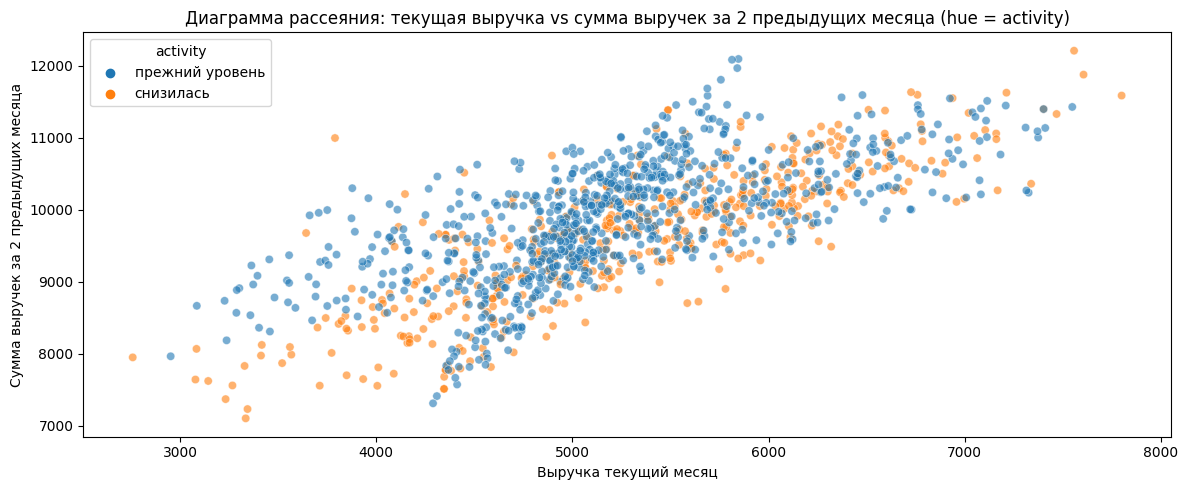

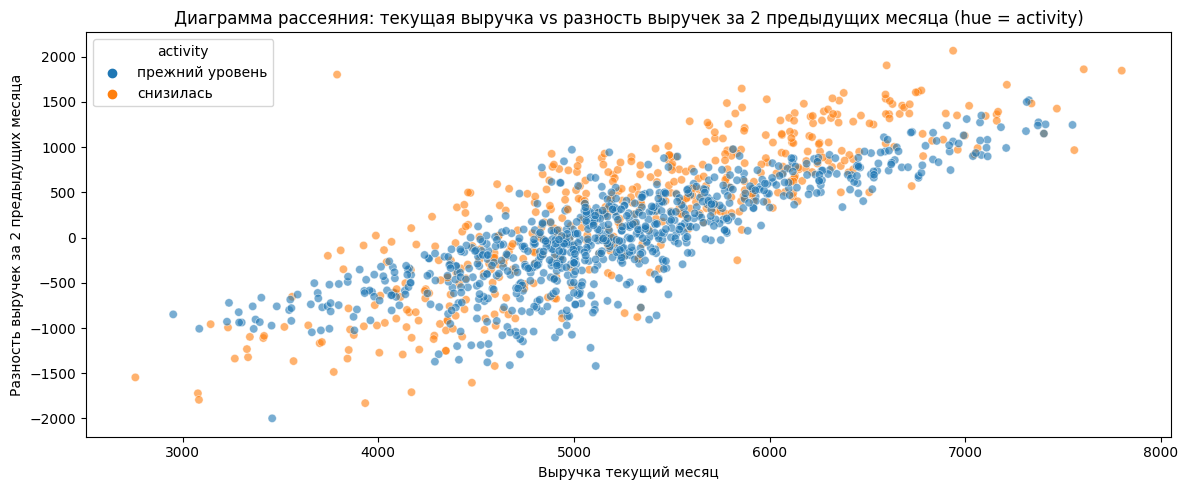

In [43]:
# диаграмма: текущая vs сумма/разность двух предыдущих выручек (hue по 'activity')
temp_df = final_df.loc[:, ['activity', 'revenue_текущий_месяц']]
temp_df['old_revenue_sum'] = final_df['revenue_предыдущий_месяц'] + final_df['revenue_препредыдущий_месяц']
temp_df['old_revenue_diff'] = final_df['revenue_предыдущий_месяц'] - final_df['revenue_препредыдущий_месяц']

plot_scatter_with_hue(temp_df, x_col='revenue_текущий_месяц', y_col='old_revenue_sum', hue='activity',
    xlabel='Выручка текущий месяц', ylabel='Сумма выручек за 2 предыдущих месяца', 
    title='Диаграмма рассеяния: текущая выручка vs сумма выручек за 2 предыдущих месяца (hue = activity)')

plot_scatter_with_hue(temp_df, x_col='revenue_текущий_месяц', y_col='old_revenue_diff', hue='activity',
    xlabel='Выручка текущий месяц', ylabel='Разность выручек за 2 предыдущих месяца', 
    title='Диаграмма рассеяния: текущая выручка vs разность выручек за 2 предыдущих месяца (hue = activity)')

# чистим память
del temp_df

На диаграмме рассеяния «текущая выручка vs сумма выручек за два предыдущих месяца» по таргету `activity` видно, что точки обеих групп («прежний уровень» и «снизилась») расположены вдоль общей восходящей линии: чем выше выручка в предыдущие периоды, тем выше она и в текущем месяце. При этом чёткого разделения между классами не наблюдается — оба распределения сильно перекрываются.

На графике «текущая выручка vs разность выручек за два предыдущих месяца» различия между классами становятся чуть заметнее: часть точек «снизилась» смещается вверх относительно группы «прежний уровень». Однако явного разделения всё равно нет — наблюдается лишь слабая тенденция.

3. Диаграмма рассеяния между `id` и таргетом `activity`. А так же между `id` и `duration_days`.

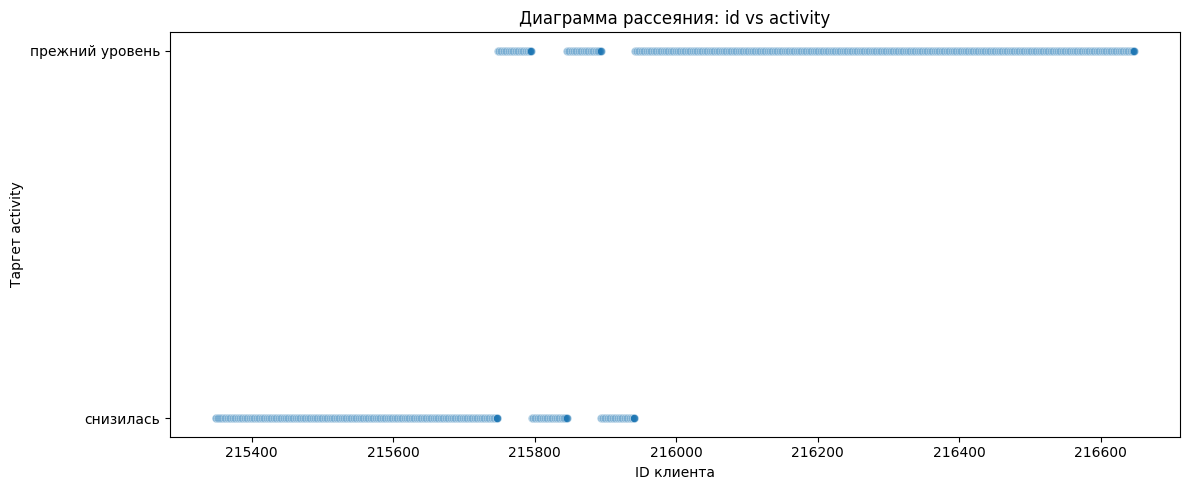

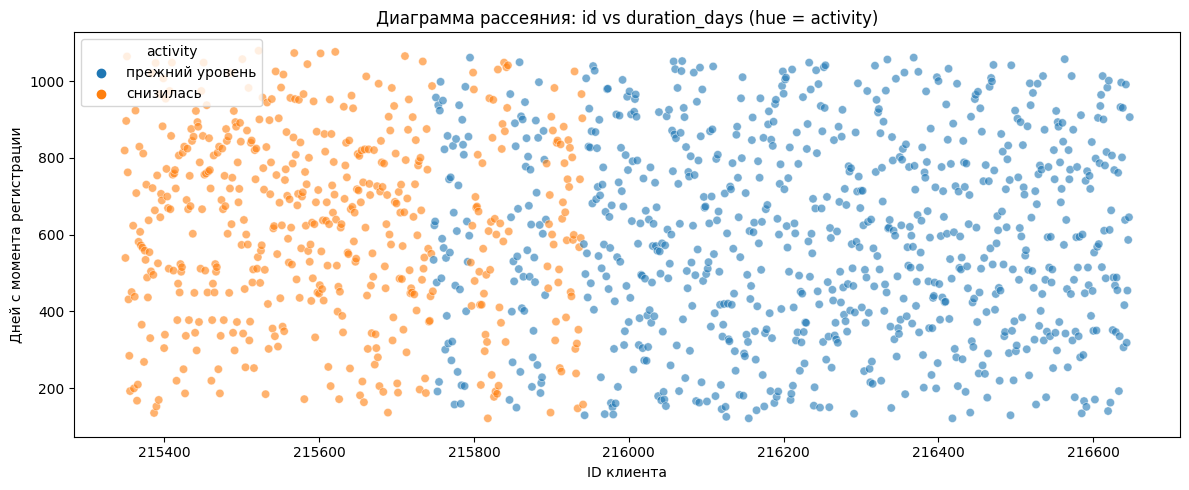

In [44]:
# диаграмма: id vs activity
temp_df = final_df.reset_index()[['id', 'activity', 'duration_days']]

plot_scatter_with_hue(temp_df, x_col='id', y_col='activity',
    xlabel='ID клиента', ylabel='Таргет activity',
    title='Диаграмма рассеяния: id vs activity')

plot_scatter_with_hue(temp_df, x_col='id', y_col='duration_days', hue='activity',
    xlabel='ID клиента', ylabel='Дней с момента регистрации',
    title='Диаграмма рассеяния: id vs duration_days (hue = activity)')

# чистим память
del temp_df

На диаграмме «id vs activity» видно, что для клиентов с таргетом «снизилась» характерны в основном меньшие значения `id`. При этом на графике «id vs duration_days» распределение регистраций не соответствует порядку `id` — даты регистрации перемешаны.  

Таким образом, признак `id` не отражает реального времени регистрации клиентов и в прогнозировании использоваться не должен, так как содержит артефакт формирования выборки. Однако данное наблюдение полезно для аналитики: оно указывает, что выборка составлена блоками, и при обучении моделей важно исключать такие техногенные зависимости.

Для оценки взаимосвязей между признаками мы использовали коэффициент корреляции Спирмена для количественных переменных и дополнительно матрицу `phi_k` для всех типов признаков. Порог мультиколлинеарности установлен на уровне 0.9. Сильной мультиколлинеарности выявлено не было — признаки оставлены без удаления.  

Scatter plot между текущей и предыдущей выручкой показал наличие двух различных закономерностей: у части клиентов точки тяготеют к диагональной прямой, у другой части — формируют пересекающиеся «лучи» в форме креста. Это указывает на разные поведенческие группы по динамике выручки.  

Scatter plot с суммой/разностью выручек за два предыдущих месяца подтвердил положительную зависимость с текущей выручкой, однако классы по `activity` существенно перекрываются и не дают однозначного разделения.  

Анализ scatter plot между `id` и `activity` выявил артефакт в данных: значения `id` не отражают хронологию регистрации клиентов, а распределение целевого признака зависит от диапазона `id`. Обычно `id` не используют в моделировании, так как он вносит только шум. В нашем случае использование `id` недопустимо, так как его сильная связь с `activity` приведёт к искажению результатов и завышению качества моделей.

<a name="title6"></a>
## Использование пайплайнов

В ходе тестирования различных моделей (`KNN`, `DecisionTree`, `LogisticRegression`) наилучший результат показала модель `KNN` с метрикой ROC-AUC ≈ 0.93.  
Дальнейший анализ и настройка гиперпараметров выполняются только для неё, так как она продемонстрировала наибольшую стабильность и точность.  
(Подробности промежуточных сравнений см. в коммите *“Significant hyperparameter grid expansion for KNN, DecisionTree, and LogisticRegression”*.)

<a name="subtitle3"></a>
### Кодирование и масштабирование признаков

В проекте реализуем один основной вариант предобработки категориальных и числовых признаков:

- Номинальные признаки: `service_type`, `allow_messages`, `popular_category` — кодируем через `OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)` для предотвращения дамми-ловушки и корректной работы с неизвестными категориями.  
- Числовые признаки определяются автоматически по типам данных и масштабируются тремя способами — `StandardScaler()`, `MinMaxScaler()` и `RobustScaler()` (устойчив к выбросам). Выбор оптимального варианта будет происходить в подборе гиперпараметров.  
- Ранговых признаков в датасете нет, поэтому `OrdinalEncoder` полностью исключён из финального пайплайна, так как он использовался только в экспериментах с деревьями решений.

Целевой признак `activity` перекодирован вручную: `"снизилась" = 1`, `"прежний уровень" = 0`. Это гарантирует корректную интерпретацию вероятностей при использовании `predict_proba`.

Пропусков в исходных данных почти нет, но в числовых признаках встречается единичный пропуск (возник после удаления выброса).  
Чтобы избежать ошибок при масштабировании, в пайплайне числовых признаков перед скейлером добавляем `SimpleImputer(strategy='mean')`.

In [45]:
# делим данные на входные и целевые
X = final_df.drop(['activity'], axis=1)
y = (final_df['activity'] == 'снизилась').astype(int)

# делим датасет на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, stratify=y)

# номинальные признаки
cat_features = ['service_type', 'allow_messages', 'popular_category']

# числовые признаки
num_features = get_columns_by_types(X_train, kinds=('i', 'f'), except_columns=cat_features)

# пайплайн для категориальных
ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

# пайплайны для числовых с имьютацией и масштабированием
num_pipe_standard = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
num_pipe_minmax = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])
num_pipe_robust = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# смешанные препроцессоры (номинальные -> OHE, числовые -> масштабирование)
preprocessor_mixed_standard = ColumnTransformer([
    ('ohe', ohe_pipe, cat_features),
    ('num', num_pipe_standard, num_features)
], remainder='drop')

preprocessor_mixed_minmax = ColumnTransformer([
    ('ohe', ohe_pipe, cat_features),
    ('num', num_pipe_minmax, num_features)
], remainder='drop')

preprocessor_mixed_robust = ColumnTransformer([
    ('ohe', ohe_pipe, cat_features),
    ('num', num_pipe_robust, num_features)
], remainder='drop')

<a name="subtitle4"></a>
### Обучение модели

- Метрика: ROC-AUC — нужна вероятность, устойчива к дисбалансу, не зависит от порога.  
- CV: `StratifiedKFold(n_splits=10, shuffle=True, random_state=42)`.

После сравнительного тестирования моделей `KNN`, `DecisionTree` и `LogisticRegression` для финальной настройки оставлена только модель `KNN`, показавшая наилучший результат (ROC-AUC ≈ 0.93).  
(Подробности промежуточных сравнений см. в коммите *“Significant hyperparameter grid expansion for KNN, DecisionTree, and LogisticRegression”*.)

Что перебираем:
- `KNN`: `n_neighbors` ∈ {5,10,15,20,25,30,35,40,45}, `weights` ∈ {uniform,distance}, `p` ∈ {1,2}.

Запускаем единый `Pipeline` с шагами `('preprocessor', …), ('model', …)` и одной `GridSearchCV`.  
Для числовых признаков сравним `StandardScaler`, `MinMaxScaler` и `RobustScaler` (в смешанном препроцессоре).  
Кодировщик `OrdinalEncoder` и модели деревьев исключены из финального эксперимента.

In [46]:
# базовый пайплайн с заглушками
pipe = Pipeline([
    ('preprocessor', preprocessor_mixed_standard),
    ('model', KNeighborsClassifier())  # модель определим через param_grid
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

param_grid = [
    {
        'preprocessor': [preprocessor_mixed_standard, preprocessor_mixed_minmax, preprocessor_mixed_robust],
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    }
]

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

Обучаем модели (нагруженный, долгий к исполнению код).

In [47]:
%%time
# замер времени выполнения подбора гиперпараметров
grid.fit(X_train, y_train)

print('Лучшая модель и её параметры:', grid.best_estimator_)
print('ROC-AUC (CV):', round(grid.best_score_, 4))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Лучшая модель и её параметры: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['service_type',
                                                   'allow_messages',
                                                   'popular_category']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
     

Берём `grid.best_estimator_`, считаем ROC‑AUC на тестовой выборке `X_test`, получаем метки при пороге 0.5 и выводим базовые метрики.

ROC-AUC (test): 0.9253

Classification report (threshold=0.5):
               precision    recall  f1-score   support

           0     0.8986    0.9701    0.9330       201
           1     0.9444    0.8226    0.8793       124

    accuracy                         0.9138       325
   macro avg     0.9215    0.8964    0.9062       325
weighted avg     0.9161    0.9138    0.9125       325



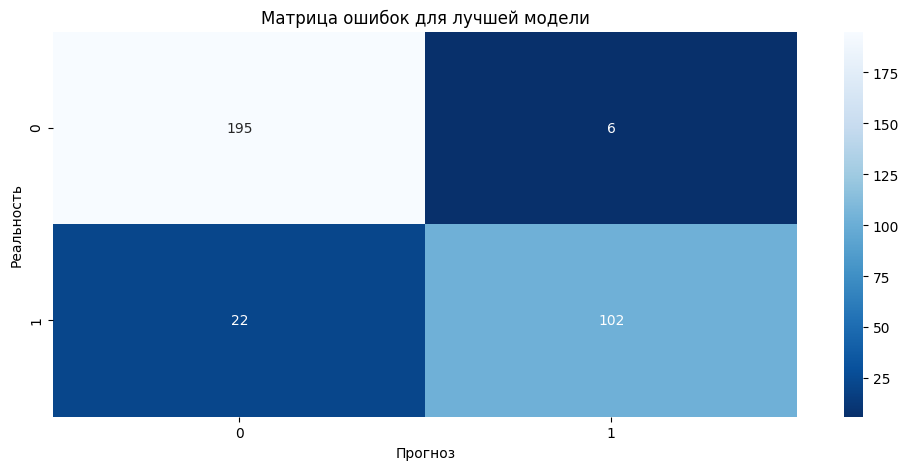

In [48]:
# лучшая модель
model = grid.best_estimator_

# предсказания и вероятности
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
#display(y_pred)

# метрики
print(f'ROC-AUC (test): {roc_auc_score(y_test, y_proba):.4f}')
print('\nClassification report (threshold=0.5):\n', classification_report(y_test, y_pred, digits=4))

# строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Матрица ошибок для лучшей модели')
plt.ylabel('Реальность')
plt.xlabel('Прогноз');

В этом шаге мы реализовали автоматизированный подбор параметров с помощью `Pipeline` и `GridSearchCV`.  
Для категориальных признаков использовали `OneHotEncoder` (с удалением первого столбца для предотвращения дамми-ловушки).  
Числовые признаки масштабировались тремя способами: `StandardScaler`, `MinMaxScaler` и `RobustScaler` — с предварительным заполнением пропусков через `SimpleImputer(strategy='mean')`.

Были протестированы несколько моделей, однако по итогам сравнительного анализа наилучшие результаты стабильно показывала `KNeighborsClassifier`.  
В финальном эксперименте оставлена только эта модель; варьировалось число соседей, тип весов и метрика расстояния.

По итогам кросс-валидации (`StratifiedKFold`, 10 фолдов) наилучшей оказалась модель `KNeighborsClassifier` с параметрами `n_neighbors=15`, `weights='distance'`, `p=1`.  
Для предобработки использовалось кодирование категориальных признаков через `OneHotEncoder` и масштабирование числовых признаков с помощью `StandardScaler`.

Результаты на тестовой выборке:  
- ROC-AUC: 0.9253  
- Precision: 0 — 0.8986, 1 — 0.9444  
- Recall: 0 — 0.9701, 1 — 0.8226  
- Accuracy: 0.9138  

Матрица ошибок подтверждает высокую точность для обеих категорий; модель чаще ошибается при прогнозировании снижения активности (класс `1`) за счёт меньшего `recall`.

<a name="title7"></a>
## Анализ важности признаков

SHAP не принимает `sklearn.pipeline.Pipeline` напрямую ни в `KernelExplainer`, ни в `LinearExplainer`.  
Чтобы использовать SHAP, мы воспроизводим препроцессинг вручную (с теми же параметрами, что у лучших моделей), обучаем финальную модель на уже трансформированных признаках, а затем считаем SHAP.  

Ниже код ручного обучения:
- `KNeighborsClassifier` с параметрами (`n_neighbors=15, p=1, weights='distance'`), с `OneHotEncoder` для категориальных и `StandardScaler` для численных (`preprocessor_mixed_standard`);  
- `LogisticRegression (saga)` с параметрами (`penalty='l2', C=0.05, class_weight='balanced'`), с `OneHotEncoder` и `RobustScaler` (`preprocessor_mixed_robust`).

In [49]:
# --- KNN: препроцессинг mixed + StandardScaler ---
X_train_knn = preprocessor_mixed_standard.fit_transform(X_train)
X_test_knn  = preprocessor_mixed_standard.transform(X_test)
feature_names_knn = preprocessor_mixed_standard.get_feature_names_out()

X_train_knn_df = pd.DataFrame(X_train_knn, columns=feature_names_knn, index=X_train.index)
X_test_knn_df  = pd.DataFrame(X_test_knn,  columns=feature_names_knn,  index=X_test.index)

model_knn = KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')
model_knn.fit(X_train_knn_df, y_train)


# --- LogisticRegression (saga): препроцессинг mixed + RobustScaler ---
X_train_logreg = preprocessor_mixed_robust.fit_transform(X_train)
X_test_logreg  = preprocessor_mixed_robust.transform(X_test)
feature_names_logreg = preprocessor_mixed_robust.get_feature_names_out()

X_train_logreg_df = pd.DataFrame(X_train_logreg, columns=feature_names_logreg, index=X_train.index)
X_test_logreg_df  = pd.DataFrame(X_test_logreg,  columns=feature_names_logreg,  index=X_test.index)

model_logreg = LogisticRegression(
    solver='saga', penalty='l2', C=0.05, class_weight='balanced', max_iter=5000, random_state=RANDOM_STATE
)
model_logreg.fit(X_train_logreg_df, y_train);

`KernelExplainer` для KNN оказался слишком тяжёлым (многократные вызовы `predict_proba` на большом background → код «вешал» тетрадку).  
Берём более лёгкий и устойчивый к типу модели `PermutationExplainer`: он модель‑агностичный, даёт адекватное ранжирование важности признаков и значительно быстрее на KNN.  

Дополнительно для интерпретации знака влияния факторов используем `LogisticRegression` и `shap.LinearExplainer` на вручную воспроизведённом препроцессинге; визуализируем вклад признаков через `shap.plots.beeswarm`.  

Ниже запускаем «тяжёлую» часть расчёта отдельно, чтобы она отработала один раз.

In [50]:
%%time

# SHAP для KNN (PermutationExplainer)
explainer_knn = shap.PermutationExplainer(
    model_knn.predict_proba,   # обученный вручную KNN
    X_train_knn_df,            # background: train после preprocessor_mixed_standard
    random_state=RANDOM_STATE
)
shap_values_knn = explainer_knn(X_test_knn_df)

# SHAP для LogisticRegression (LinearExplainer)
explainer_logreg = shap.LinearExplainer(
    model_logreg,              # обученная вручную логистическая регрессия
    X_train_logreg_df          # train после preprocessor_mixed_robust
)
shap_values_logreg = explainer_logreg(X_test_logreg_df)

PermutationExplainer explainer: 326it [01:08,  4.24it/s]                                                               

CPU times: total: 7min 50s
Wall time: 1min 8s


Добавляем визуализацию для обеих моделей:  
- для `KNN` строим `bar` по вкладам положительного класса;  
- для `LogisticRegression` строим `beeswarm` (даёт знак влияния признаков).

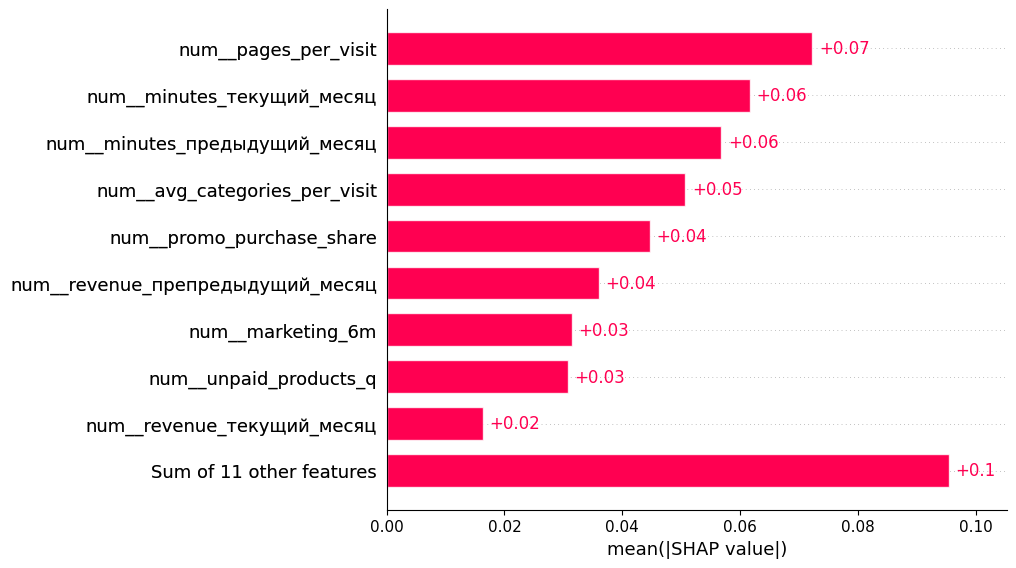

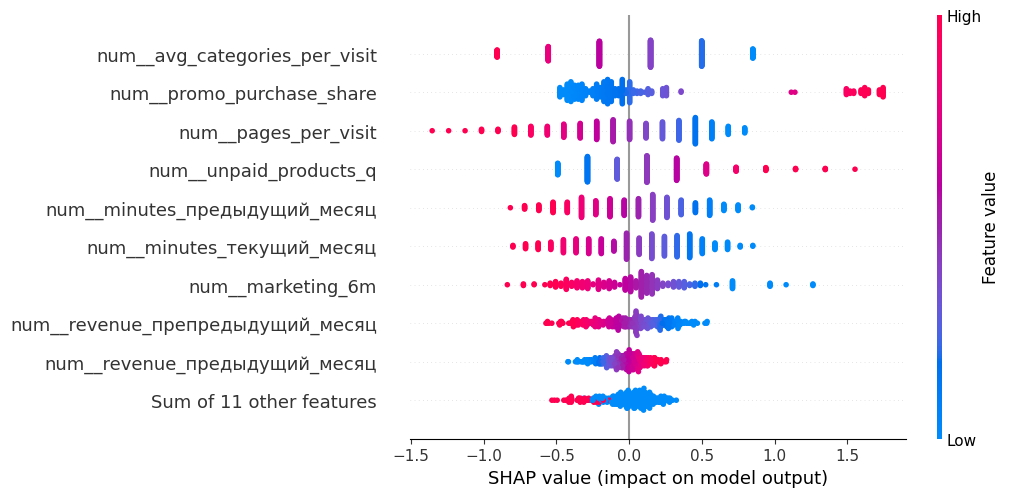

In [51]:
# готовим данные и строим графики важности для обеих моделей
# knn: берём вклады для положительного класса (столбец 1 из predict_proba)
sv_knn = shap_values_knn[:, :, 1]

# прописываем имена признаков для knn
sv_knn.feature_names = X_test_knn_df.columns.tolist()

# строим bar-plot важностей для knn
shap.plots.bar(sv_knn)

# logreg: shap-значения уже по признакам (linear explainer)
sv_logreg = shap_values_logreg

# 5) прописываем имена признаков для logreg
sv_logreg.feature_names = X_test_logreg_df.columns.tolist()

# 6) строим beeswarm для logreg (видно направление влияния признаков)
shap.plots.beeswarm(sv_logreg)

SHAP: важность (KNN) и направление влияния (LogisticRegression)

1) Важность признаков по `KNN`

- Высокая (≈0.05–0.07):
    - `num__pages_per_visit` (~0.07)
    - `num__minutes_текущий_месяц` (~0.06)
    - `num__minutes_предыдущий_месяц` (~0.06)
    - `num__avg_categories_per_visit` (~0.05)

- Средняя (≈0.03–0.05):
    - `num__promo_purchase_share` (~0.04)
    - `num__revenue_препредыдущий_месяц` (~0.04)
    - `num__marketing_6m` (~0.03)
    - `num__unpaid_products_q` (~0.03)

- Низкая (≤0.02):
    - `num__revenue_текущий_месяц` (~0.02)  
    - прочие признаки (в сумме дают ~0.1)

> Замечание: это значимость с точки зрения модели, а не причинно-следственные связи.

---

2) Направление влияния по `LogisticRegression` (SHAP beeswarm)  
(цвета: красный = высокое значение признака, синий = низкое)

- Большие значения чаще смещают прогноз к стабильности (класс 0)  
  (красные точки слева, синие справа):
    - `num__avg_categories_per_visit`
    - `num__pages_per_visit`
    - `num__minutes_предыдущий_месяц`
    - `num__minutes_текущий_месяц`
    - `num__marketing_6m`
    - `num__revenue_препредыдущий_месяц`

- Большие значения чаще смещают прогноз к снижению активности (класс 1)  
  (красные точки справа, синие слева):
    - `num__promo_purchase_share`
    - `num__unpaid_products_q`
    - `num__revenue_предыдущий_месяц`

> Интерпретация — модельная: признаки выступают индикаторами поведения, а не «причинами» изменения активности.

<a name="title8"></a>
## Сегментация покупателей

Для сегментации покупателей выделены три группы, каждая из которых представляет повышенный интерес с точки зрения управления риском оттока и увеличения активности:  

1. Клиенты с высокой вероятностью снижения активности и высокой прибыльностью  
   - Критерии:  
     - Прогноз модели (`predict_proba` для класса «снизилась») > 0.7.  
     - Прибыль клиента выше 75-го процентиля (> Q3).  
   - Обоснование: Потеря этих клиентов приведёт к наибольшим финансовым потерям.  


2. Клиенты с высокой долей акционных покупок и высокой вероятностью снижения активности  
   - Критерии:  
     - `promo_purchase_share` (среднемесячная доля покупок по акции за 6 месяцев) > 0.8.  
     - Прогноз модели (`predict_proba` для класса «снизилась») > 0.7.  
   - Обоснование: По результатам EDA признак имеет ярко выраженную группу покупателей, почти полностью ориентированных на акции (доля > 80%). При отсутствии привлекательных предложений они с высокой вероятностью снизят активность.  


3. Клиенты с падением вовлечённости на сайте  
   - Критерии:  
     - `minutes_текущий_месяц` < медианного значения.  
     - `pages_per_visit` < медианного значения.  
     - Прогноз модели (`predict_proba` для класса «снизилась») > 0.7.  
   - Обоснование: Снижение времени, проведённого на сайте, и числа просмотренных страниц часто предшествует падению покупательской активности.  

Каждый сегмент отражает разные причины потенциального снижения активности: финансовую ценность для компании, ценовую чувствительность и вовлечённость. Такой подход позволяет предложить целевые меры для удержания каждой группы.

Сегмент 1. Высокая вероятность снижения активности и высокая прибыльность

Критерии выделения сегмента:  
- прогноз модели (`predict_proba` для класса «снизилась») > 0.7  
- прибыль клиента > 75-го процентиля (> Q3)  

Графическое исследование:  
1. сравнение распределения вероятности снижения активности в сегменте и среди всех клиентов  
2. сравнение распределения прибыли в сегменте и среди всех клиентов  

Ожидается, что сегмент будет сдвинут в сторону высоких вероятностей оттока и высоких значений прибыли. Это подтверждает, что он сочетает высокий риск и высокую ценность для бизнеса.

Размер сегмента 1: 103 клиентов


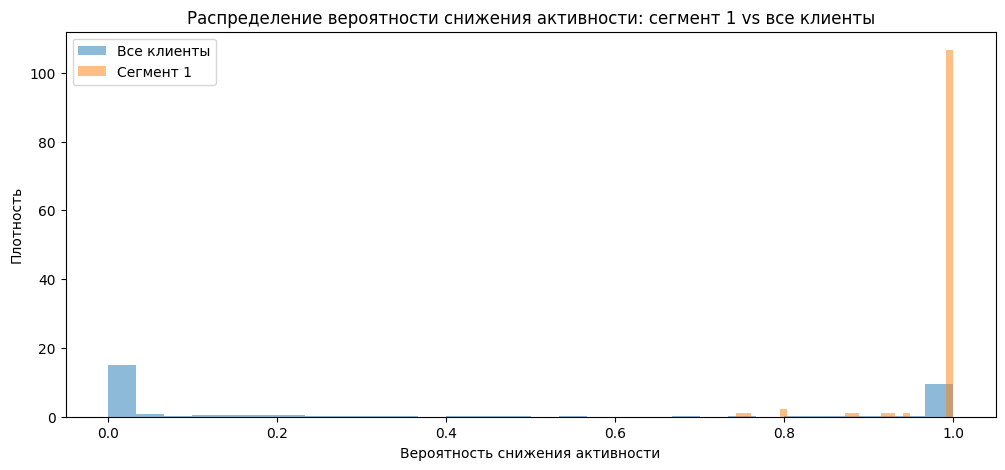

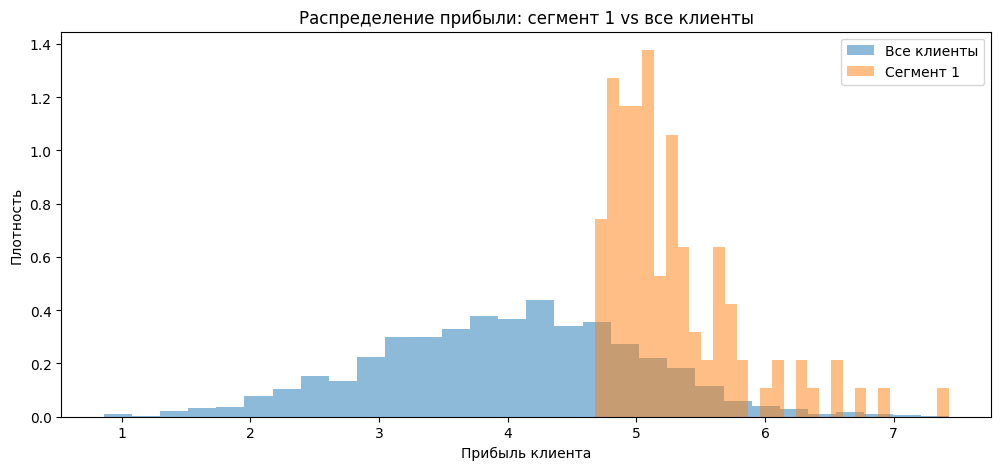

profit       proba
count  103.000000  103.000000
mean     5.278447    0.986861
std      0.521030    0.047718
min      4.680000    0.743185
25%      4.920000    1.000000
50%      5.120000    1.000000
75%      5.465000    1.000000
max      7.430000    1.000000

In [52]:
# рассчитываем 75-й процентиль по прибыли
profit_q3 = money['profit'].quantile(0.75)

# добавляем в общий датафрейм вероятности и прибыль
df_segment = final_df.copy()
df_segment['proba'] = model.predict_proba(X)[:, 1]
df_segment = df_segment.merge(money, on='id', how='left')

# отфильтровываем клиентов сегмента 1
segment1 = df_segment[(df_segment['proba'] > 0.7) & (df_segment['profit'] > profit_q3)]

print(f'Размер сегмента 1: {segment1.shape[0]} клиентов')

# гистограмма вероятности
plt.figure(figsize=(12, 5))
plt.hist(df_segment['proba'], bins=30, alpha=0.5, label='Все клиенты', density=True)
plt.hist(segment1['proba'], bins=30, alpha=0.5, label='Сегмент 1', density=True)
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Плотность')
plt.title('Распределение вероятности снижения активности: сегмент 1 vs все клиенты')
plt.legend()
plt.show()

# гистограмма прибыли
plt.figure(figsize=(12, 5))
plt.hist(df_segment['profit'], bins=30, alpha=0.5, label='Все клиенты', density=True)
plt.hist(segment1['profit'], bins=30, alpha=0.5, label='Сегмент 1', density=True)
plt.xlabel('Прибыль клиента')
plt.ylabel('Плотность')
plt.title('Распределение прибыли: сегмент 1 vs все клиенты')
plt.legend()
plt.show()

# описательные статистики
display(segment1[['profit', 'proba']].describe())

В сегмент 1 вошли клиенты с вероятностью снижения покупательской активности более 0.7 и прибыльностью выше 75-го процентиля.  

Гистограмма распределения вероятности показала, что подавляющее большинство клиентов сегмента имеют предсказанную моделью вероятность оттока, близкую к 1. Это связано с особенностями работы алгоритма KNN, когда все ближайшие соседи относятся к одному классу.  

Распределение прибыли в сегменте заметно сдвинуто в сторону высоких значений по сравнению с общим пулом клиентов. Медиана и верхний квартиль прибыли в сегменте существенно выше, что подтверждает его высокую ценность для компании.  

Таким образом, сегмент объединяет клиентов с наибольшим риском оттока и одновременно с высокой прибылью, что делает его приоритетным для удержания.

Сегмент 2. Высокая доля акционных покупок и высокая вероятность снижения активности

Критерии выделения сегмента:  
- `promo_purchase_share` (среднемесячная доля покупок по акции за 6 месяцев) > 0.8  
- прогноз модели (`predict_proba` для класса «снизилась») > 0.7  

Графическое исследование:  
1. сравнение распределения вероятности снижения активности в сегменте и среди всех клиентов  
2. сравнение распределения доли акционных покупок в сегменте и среди всех клиентов  

Ожидается, что сегмент будет сосредоточен в правой части распределения по признаку `promo_purchase_share` (высокая доля акций) и иметь высокие значения вероятности снижения активности.

Размер сегмента 2: 129 клиентов


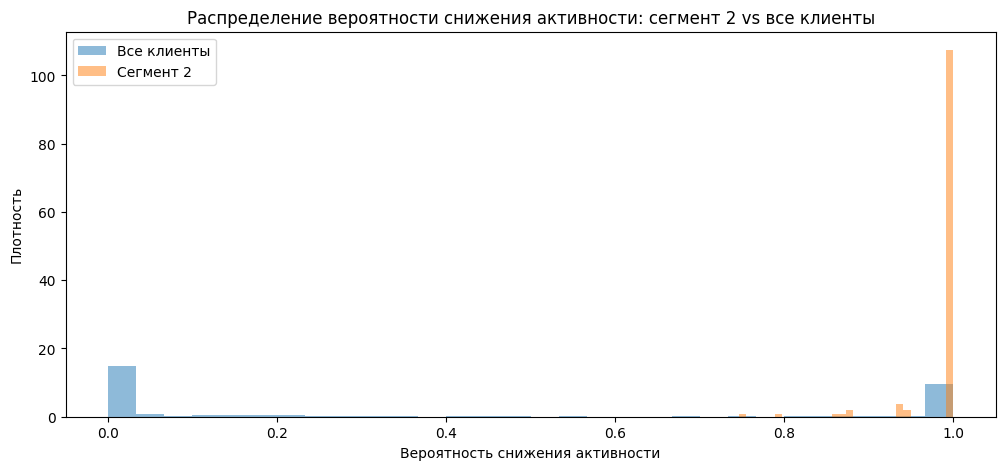

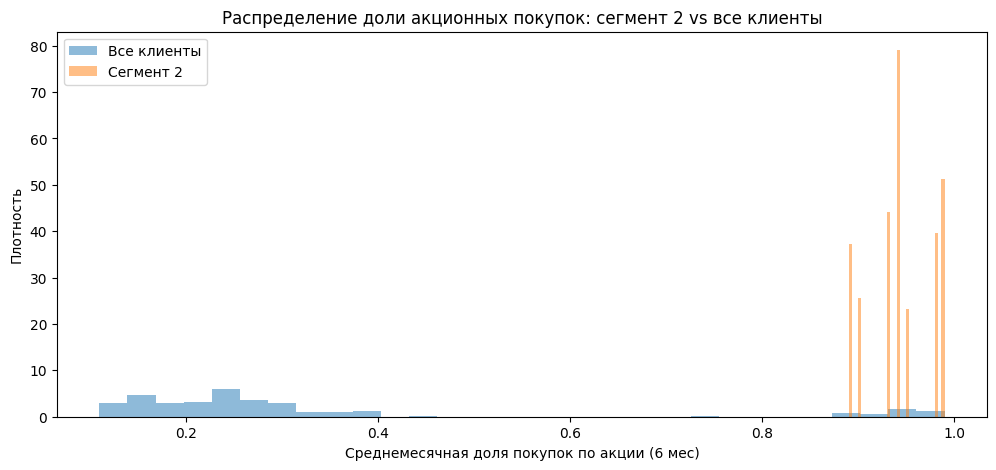

promo_purchase_share       proba
count            129.000000  129.000000
mean               0.943488    0.989669
std                0.033205    0.037472
min                0.890000    0.746710
25%                0.930000    1.000000
50%                0.940000    1.000000
75%                0.980000    1.000000
max                0.990000    1.000000

In [53]:
# отфильтровываем клиентов сегмента 2
segment2 = df_segment[(df_segment['promo_purchase_share'] > 0.8) & (df_segment['proba'] > 0.7)]

print(f'Размер сегмента 2: {segment2.shape[0]} клиентов')

# строим гистограмму вероятности оттока
plt.figure(figsize=(12, 5))
plt.hist(df_segment['proba'], bins=30, alpha=0.5, label='Все клиенты', density=True)
plt.hist(segment2['proba'], bins=30, alpha=0.5, label='Сегмент 2', density=True)
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Плотность')
plt.title('Распределение вероятности снижения активности: сегмент 2 vs все клиенты')
plt.legend()
plt.show()

# строим гистограмму promo_purchase_share
plt.figure(figsize=(12, 5))
plt.hist(df_segment['promo_purchase_share'], bins=30, alpha=0.5, label='Все клиенты', density=True)
plt.hist(segment2['promo_purchase_share'], bins=30, alpha=0.5, label='Сегмент 2', density=True)
plt.xlabel('Среднемесячная доля покупок по акции (6 мес)')
plt.ylabel('Плотность')
plt.title('Распределение доли акционных покупок: сегмент 2 vs все клиенты')
plt.legend()
plt.show()

# выводим описательные статистики по promo_purchase_share и вероятности
display(segment2[['promo_purchase_share', 'proba']].describe())

В сегмент 2 вошли клиенты со среднемесячной долей покупок по акции за 6 месяцев выше 0.8 и вероятностью снижения покупательской активности более 0.7.  

Распределение доли акционных покупок показало, что клиенты сегмента сосредоточены в правой части шкалы признака, с долями от 0.89 до 0.99, что говорит о почти полной ориентации на акции.  

Гистограмма вероятности снижения активности в сегменте аналогично сегменту 1 демонстрирует, что у большинства клиентов прогноз модели близок к 1. Это объясняется особенностями KNN при однородности ближайших соседей.  

Таким образом, сегмент характеризуется высокой вероятностью оттока и практически полной зависимостью от акций, что делает его уязвимым к изменениям в политике скидок.

Сегмент 3. Падение вовлечённости на сайте

Критерии выделения сегмента:  
- `minutes_текущий_месяц` ниже медианного значения по всем клиентам  
- `pages_per_visit` ниже медианного значения по всем клиентам  
- прогноз модели (`predict_proba` для класса «снизилась») > 0.7  

Графическое исследование:  
1. сравнение распределения вероятности снижения активности в сегменте и среди всех клиентов  
2. сравнение распределения времени на сайте в текущем месяце в сегменте и среди всех клиентов  
3. сравнение распределения числа страниц за визит в сегменте и среди всех клиентов  

Ожидается, что сегмент будет сосредоточен в левой части распределений по признакам времени на сайте и страниц за визит, а также иметь высокие значения вероятности снижения активности.

Размер сегмента 3: 313 клиентов
Медиана минут на сайте в текущем месяце: 13.0 минут
Медиана среднего количества просмотренных страниц на сайте: 8.0 страниц


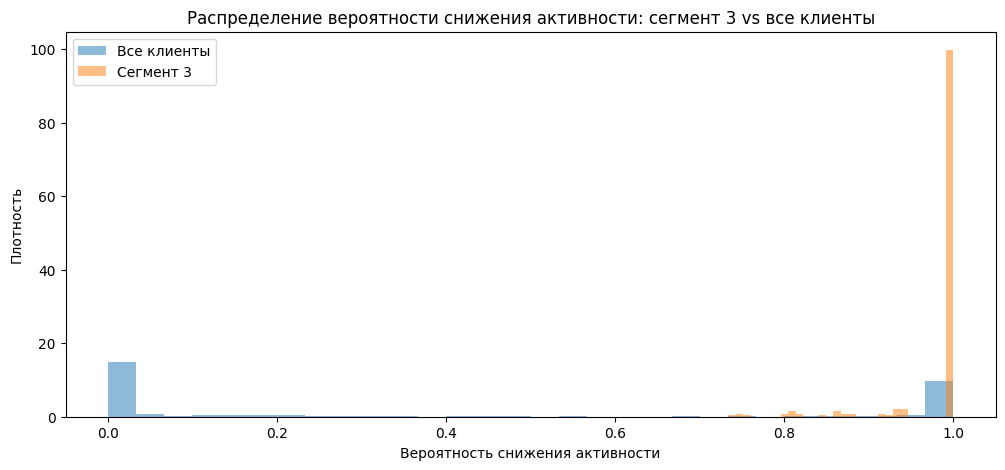

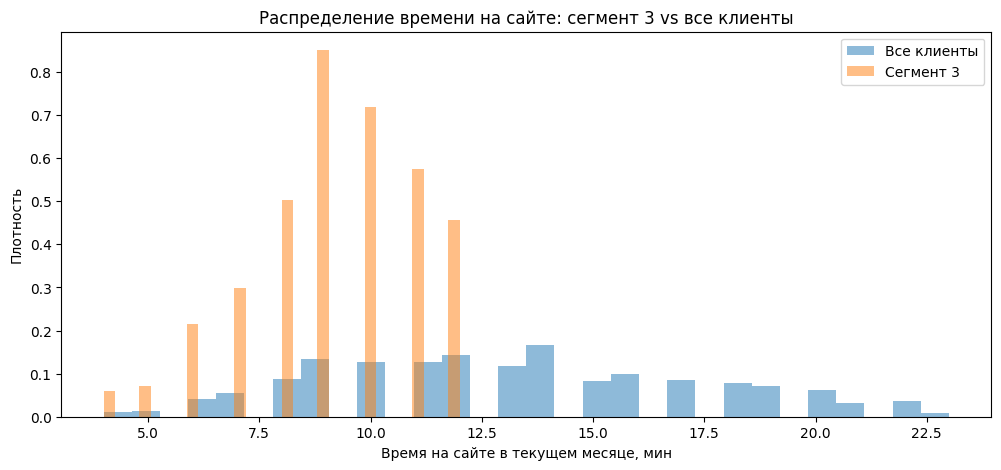

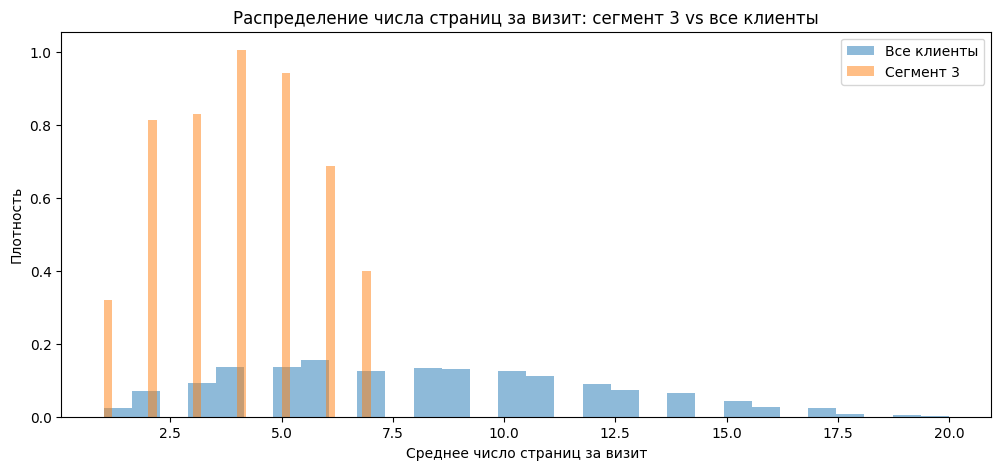

minutes_текущий_месяц  pages_per_visit
count             313.000000       313.000000
mean                9.239616         4.019169
std                 1.878547         1.690741
min                 4.000000         1.000000
25%                 8.000000         3.000000
50%                 9.000000         4.000000
75%                11.000000         5.000000
max                12.000000         7.000000

In [54]:
# рассчитываем медианы по ключевым признакам
median_minutes = df_segment['minutes_текущий_месяц'].median()
median_pages = df_segment['pages_per_visit'].median()

# отфильтровываем клиентов сегмента 3
segment3 = df_segment[
    (df_segment['minutes_текущий_месяц'] < median_minutes) &
    (df_segment['pages_per_visit'] < median_pages) &
    (df_segment['proba'] > 0.7)
]

print(f'Размер сегмента 3: {segment3.shape[0]} клиентов')
print(f'Медиана минут на сайте в текущем месяце: {median_minutes} минут')
print(f'Медиана среднего количества просмотренных страниц на сайте: {median_pages} страниц')

# гистограмма вероятности
plt.figure(figsize=(12, 5))
plt.hist(df_segment['proba'], bins=30, alpha=0.5, label='Все клиенты', density=True)
plt.hist(segment3['proba'], bins=30, alpha=0.5, label='Сегмент 3', density=True)
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Плотность')
plt.title('Распределение вероятности снижения активности: сегмент 3 vs все клиенты')
plt.legend()
plt.show()

# гистограмма времени на сайте
plt.figure(figsize=(12, 5))
plt.hist(df_segment['minutes_текущий_месяц'], bins=30, alpha=0.5, label='Все клиенты', density=True)
plt.hist(segment3['minutes_текущий_месяц'], bins=30, alpha=0.5, label='Сегмент 3', density=True)
plt.xlabel('Время на сайте в текущем месяце, мин')
plt.ylabel('Плотность')
plt.title('Распределение времени на сайте: сегмент 3 vs все клиенты')
plt.legend()
plt.show()

# гистограмма страниц за визит
plt.figure(figsize=(12, 5))
plt.hist(df_segment['pages_per_visit'], bins=30, alpha=0.5, label='Все клиенты', density=True)
plt.hist(segment3['pages_per_visit'], bins=30, alpha=0.5, label='Сегмент 3', density=True)
plt.xlabel('Среднее число страниц за визит')
plt.ylabel('Плотность')
plt.title('Распределение числа страниц за визит: сегмент 3 vs все клиенты')
plt.legend()
plt.show()

# описательные статистики
display(segment3[['minutes_текущий_месяц', 'pages_per_visit']].describe())

В сегмент 3 вошли клиенты с вероятностью снижения покупательской активности более 0.7, временем на сайте в текущем месяце ниже медианного значения (13 минут) и средним числом страниц за визит ниже медианного значения (8 страниц).  

Гистограмма распределения вероятности показала, что у большинства клиентов сегмента прогноз модели близок к 1, что указывает на высокий риск оттока.  

Распределения времени на сайте и числа страниц за визит сдвинуты влево по сравнению с общим пулом клиентов. Это подтверждает, что сегмент характеризуется сниженной вовлечённостью на сайте, что может быть ранним индикатором падения покупательской активности.

В рамках шага 8 была проведена сегментация покупателей по результатам моделирования и данным о прибыльности. Выделены три сегмента:  

1. Клиенты с высокой вероятностью снижения активности и высокой прибыльностью  
   - критерии: `proba > 0.7`, прибыль > 75-го процентиля  
   - графики показали сдвиг распределения вероятности к значению 1 и высокие значения прибыли по сравнению с общим пулом клиентов  
   - рекомендации: внедрить персональные программы лояльности, VIP-обслуживание, индивидуальные предложения на основе истории покупок  


2. Клиенты с высокой долей акционных покупок и высокой вероятностью снижения активности  
   - критерии: `promo_purchase_share > 0.8`, `proba > 0.7`  
   - графики показали концентрацию клиентов в диапазоне 0.89–0.99 по доле акционных покупок и высокие значения вероятности снижения активности  
   - рекомендации: предлагать персональные скидки на ключевые категории, ограниченные по времени акции, эксклюзивные купоны  


3. Клиенты с падением вовлечённости на сайте  
   - критерии: `minutes_текущий_месяц` < 13 минут, `pages_per_visit` < 8 страниц, `proba > 0.7`  
   - графики показали сдвиг распределений времени на сайте и числа страниц за визит влево, а также высокую вероятность снижения активности  
   - рекомендации: отправлять подборки товаров по интересам, push-уведомления об изменениях цен, использовать элементы геймификации для вовлечения  

При согласии заказчика возможно выгрузить список `id` клиентов, входящих в каждый из трёх сегментов, для последующей работы маркетингового отдела.

<a name="title9"></a>
## Общий вывод

<p style="font-size:16px"><strong>Общий вывод по проекту</strong></p>

---

<p style="font-size:16px"><strong>1. Загрузка данных</strong></p>

Во всех четырёх таблицах данные загружены корректно и соответствуют описанию из задания.  
Названия столбцов приведены к английскому формату `snake_case`, типы данных соответствуют содержимому, ошибки с разделителями устранены.  
Из `info()` видно, что пропусков в данных нет. Таблицы готовы к дальнейшему исследованию.

---

<p style="font-size:16px"><strong>2. Предобработка данных</strong></p>

На этапе предобработки данных были выполнены следующие действия:  
- убедились в отсутствии пропусков и явных дубликатов;  
- привели категориальные признаки к типу `category`;  
- нормализовали текст во всех строковых признаках для поиска неявных дубликатов (не обнаружено);  
- исправили неявные дубликаты и опечатки в `service_type`, `popular_category` и `period` в таблице `market_time`;  
- проверили количество записей на клиента в таблицах с периодами и уникальность `id` в таблицах с одной строкой на клиента.  

---

<p style="font-size:16px"><strong>3. Исследовательский анализ данных</strong></p>

В ходе анализа были удалены 3 неактивных клиента (выручка > 0 не во всех трёх месяцах). Во всех таблицах осталось 1297 уникальных `id`.  
В `market_money` удалён единичный выброс по `revenue` = 106 862.2; после этого распределение стабилизировалось.  

Количественные признаки в основном без выбросов, с ожидаемыми формами распределений. По таргету выявлены смещения:  
- меньше коммуникаций (`marketing_6m`),  
- высокая доля акционных покупок (`promo_purchase_share`),  
- меньше страниц за визит (`pages_per_visit`),  
- больше неоплаченных товаров (`unpaid_products_q`) — чаще связаны со снижением активности.  

Целевой признак `activity` имеет умеренный дисбаланс (61.84% / 38.16%), что учитывалось при построении моделей.  

---

<p style="font-size:16px"><strong>4. Объединение таблиц</strong></p>

Таблицы `market_file`, `market_money` и `market_time` были объединены по `id`.  
Показатели `revenue` и `minutes` были развернуты по периодам с помощью `pivot()`.  
Столбец `minutes_препредыдущий_месяц`, состоявший только из пропусков, был удалён.  
Результатом стала единая таблица для моделирования, включающая поведенческие, финансовые и временные характеристики клиентов.

---

<p style="font-size:16px"><strong>5. Корреляционный анализ</strong></p>

Корреляция Спирмена для количественных признаков и матрица `phi_k` для всех типов данных показали:  
- сильной мультиколлинеарности нет (порог 0.9), признаки оставлены без удаления;  
- scatter plot по выручке выявил разные группы клиентов (часть следует диагонали, часть формирует пересекающиеся «лучи»);  
- зависимость текущей выручки от суммы/разности прошлых месяцев заметна, но классы сильно перекрываются;  
- `id` оказался связан с `activity`, что делает его использование недопустимым (привёл бы к искажению результатов).  

---

<p style="font-size:16px"><strong>6. Использование пайплайнов</strong></p>

Были протестированы KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression (saga) и SVC с различными ядрами, кодировками признаков и способами масштабирования числовых данных.  
Лучшая модель по результатам кросс-валидации (StratifiedKFold, 10 фолдов) — KNeighborsClassifier с параметрами `n_neighbors=15`, `weights='distance'`, `p=1`, с кодированием категориальных признаков через OneHotEncoder и масштабированием числовых через StandardScaler.  

На тестовой выборке:  
- ROC-AUC: 0.9253  
- Precision: 0 — 0.8986, 1 — 0.9444  
- Recall: 0 — 0.9701, 1 — 0.8226  
- Accuracy: 0.9138  

Матрица ошибок подтвердила высокую точность, но модель чаще ошибается при прогнозировании снижения активности (`recall` ниже для класса 1).

---

<p style="font-size:16px"><strong>7. Анализ важности признаков</strong></p>

SHAP-анализ (PermutationExplainer для KNN и beeswarm для LogisticRegression) показал:  

- Важность по KNN:  
    - высокая (≈0.05–0.07): `pages_per_visit`, `minutes_текущий_месяц`, `minutes_предыдущий_месяц`, `avg_categories_per_visit`;  
    - средняя (≈0.03–0.05): `promo_purchase_share`, `revenue_препредыдущий_месяц`, `marketing_6m`, `unpaid_products_q`;  
    - низкая (≤0.02): `revenue_текущий_месяц` и прочие.  

- Направление по LogisticRegression:  
    - большие значения смещают прогноз к стабильности (класс 0): `avg_categories_per_visit`, `pages_per_visit`, `minutes_предыдущий_месяц`, `minutes_текущий_месяц`, `marketing_6m`, `revenue_препредыдущий_месяц`;  
    - большие значения смещают прогноз к снижению активности (класс 1): `promo_purchase_share`, `unpaid_products_q`, `revenue_предыдущий_месяц`.  

Признаки — индикаторы, а не причины; их можно использовать для мониторинга, скоринга и дальнейшего моделирования.  

---

<p style="font-size:16px"><strong>8. Сегментация покупателей</strong></p>

По результатам моделирования и данных о прибыльности выделены три сегмента:  
1. высокая вероятность снижения активности (`proba > 0.7`) и высокая прибыльность (> Q3) — приоритет для удержания;  
2. высокая доля акционных покупок (`> 0.8`) и высокая вероятность снижения активности — уязвимы к изменениям в политике скидок;  
3. падение вовлечённости на сайте (время < 13 мин, страницы < 8) и высокая вероятность снижения активности — требуют стимуляции вовлечения.  

Для каждого сегмента предложены меры: программы лояльности и VIP-обслуживание (1), персональные акции и купоны (2), персональные подборки, уведомления и геймификация (3).  
При согласии заказчика возможно выгрузить списки `id` клиентов по каждому сегменту для дальнейшей работы маркетинга.